

# Reporte de problemas fitosanitarios en plantaciones de agave
--------------------

## Equipo 36

| Nombre | Matrícula |
| ------ | --------- |
| André Martins Cordebello | A00572928 |
| Enrique Eduardo Solís Da Costa | A00572678 |
| Delbert Francisco Custodio Vargas | A01795613 |

## Avance 1: análisis exploratorio de datos

Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes.

# EDA
--------------------------

## Cargando los datos

La CNIT compartió 2 archivos de Excel en los cuáles se encuentra el muestreo de la presencia de gorgojos del agave detectados por sensores conocidos como "trampas". Dichas trampas se encuentran esparcidas en al menos 5 estados, incluído el estado de Jalisco, el cual cuenta con presencia de operaciones de la CNIT.

En dichos datasets encontramos los siguientes tipos de datos:

| Dato | Tipo | ¿Qué significa? |
| ---- | ---- | --------------  |
| ID Trampa | Texto, nominal. | Es el ID único que se le da a la trampa al colocarse en alguna parcela o predio. Una misma trampa puede colocarse en distintos predios, pero la identificación de la misma cambia acorde a dónde se colocó. |
|	Fecha Trampeo | DateTime, nominal. | Es la fecha en la que se llevó a cabo el conteo de cadáveres de gorgojo en la trampa. |
| Latitud | Float, continua. | Parte de la ubicación donde se encontraba la trampa. En conjunto con la longitud es posible conocer la ubicación de donde se llevó a cabo el muestreo.|
| Longitud  | Float, continua. | Parte de la ubicación donde se encontraba la trampa. En conjunto con la latitud es posible conocer la ubicación de donde se llevó a cabo el muestreo. |
| Municipio | Texto, nominal. | Municipio al que pertenecía la trampa al momento de hacer el muestreo. |
| Superficie (Has) | Float, continua. | Area que cubre el predio donde se colocó la trampa. |
| Edad de la plantación en años | Entero, discreta. | Años que una plantación de agave tiene desde la última purga. | 
| No. de Capturas | Entero, discreta. | Cantidad de gorgojos del agave encontrados dentro de la trampa. |
| Cebo | Texto, nominal. | Tipo de carnada que se coloca dentro de las trampas para atraer al gorgojo del agave. |
| Estado | Texto, nominal. | Estado de México donde se encontraba la trampa colocada. |
| PAIS  | Texto, nominal. | País al que pertenecía la trampa al momento de hacer el muestreo. |
| UBICACIÓN | Texto, nominal. | Unión de la información contenida en las columnas de Municipio, Estado y País. |
| SEMA | Texto, ordinal. | "SEMA" se refiere al término de "Semáforo", y contiene la severidad de la infestación encontrada durante el muestreo. Estos niveles fueron definidos por la SICAFI. |
| Mun Est  | Texto, nominal. | Unión de las columnas Municipio y Estado. |
| Empresa | Texto, nominal. | Código único por cada una de las empresas encargadas de revisar, contar y preparar las trampas. |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Carga de datasets

historic_captures_dataframe     = pd.read_excel( "Capturas_Picudo_2014_a_2024.xlsx", sheet_name="Datos", header= 0)
current_year_captures_dataframe = pd.read_excel("Capturas_Picudo_2025.xlsx", sheet_name="DB", header=0)

## Técnica de muestreo y algunas generalidades
---------------
Nuestro Sponsor nos comentó que por motivos de confidencialidad no podían indicarnos los nombres de las empresas y el proceso que llevan a cabo para muestrear la cantidad de gorgojos del agave. Con esto, lo que sí fue posible compartirnos es lo siguiente:

1. Los muestreos por trampa no deben superar los 15 días, ya que es el tiempo máximo permitido entre muestreos y es el parámetro designado en la campaña de muestreo.
2. A inicios de 2025 tuvieron algunos problemas con el muestreo de gorgojos en algunas empresas, y los valores  que se muestran es el promedio de cadáveres mensual.
3. El monitoreo de gorgojos se hace como un conteo de cadáveres cada 15 días.
4. Las trampas se mueven de lugar o parcela, pero al hacer esto la misma se identifica con un ID distinto. Por lo tanto, una misma trampa puede aparecer con un 2 o más IDs en el dataset. Esto significa que el ID de cada trampa es relativo a la ubicación de ésta.
5. La densidad de trampas es de 1 trampa cada 10 hectáreas, con preferencia a que la trampa no esté ubicada en los bordes del predio y la misma debe estar a los pies de una planta de agave.
6. El conteo de cadáveres de gorgojos no es acumulativo; es decir, cada 15 días se hace el conteo de cadáveres dentro de una trampa y luego se limpia la misma y se vuelve a preparar.
7. Se considera que existe un foco de infestación al tener 5 o más gorgojos en promedio atrapados por día.
8. Aunque existen distintas clasificaciones de carnada en el dataset, realmente se cuenta con solo un tipo de carnada, ya que ésta fue estandarizada al  inicio de la campaña de muestreo.
9. Existen alrededor de 26 empresas encargadas de llevar el muestreo de las trampas, pero no se cuenta con la información de éstas en el dataset compartido.
10. De forma  general, cuando una plantación supera los 5 años de producción, los productores proceden a jimar el predio. Según nuestro sponsor, un predio mayor a 5 años ya se considera como un predio antiguo, y por lo tanto los productores tienden a jimar el mismo.


El dataset se encuentra gobernado por las condiciones definidas en el **Manual Operativo de la campaña contra plagas reglamentadas del Agave**, disponible en https://www.gob.mx/cms/uploads/attachment/file/234136/Manual_Operativo_de_la_campa_a_contra_plagas_reglamentadas_del_agave_2017.compressed.pdf, lo cual fue confirmado por nuestro Sponsor (CNIT).

-----------------------------
### Comparación de columnas
----------------------------

Al comparar las columnas que tiene cada dataset incluído, es posible notar que la columna `Empresa` de los datos del año  2025 no fue tomada en cuenta para el DataSet histórico que incluye información del 2014 al 2024. Por lo tanto, contactamos a nuestro Sponsor (CNIT) y nos comentaron que esta columna contiene la siguiente información:

- Un tag o identificador único asignado a cada una de las empresas que se encargan de llevar a cabo el muestreo de capturas.
- Este tag se creó a partir de Julio de 2025, y no es posible obtener o generar el Tag perteneciente a las muestras del 2014 al 2024.

Con esto, 31016 registros (3.74% del total de datos) cuentan con un valor en la columna de `Empresa`, por lo que a nivel general será posible utilizar esta información solamente para analizar tendencias de los últimos meses registrados, pero no para explorar el total del dataset con el que contamos.

In [3]:
print(f'El DataSet de capturas entre 2014 y 2024 tiene las siguientes columnas:\n\n{historic_captures_dataframe.columns}')
print("==============================================================\n")
print(f'El DataSet de capturas en el 2025 tiene las siguientes columnas:\n\n{current_year_captures_dataframe.columns}')

El DataSet de capturas entre 2014 y 2024 tiene las siguientes columnas:

Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est'],
      dtype='object')

El DataSet de capturas en el 2025 tiene las siguientes columnas:

Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est', 'Empresa'],
      dtype='object')


Por lo tanto, haremos una copia de las filas que sí contienen información de la empresa encargada del muestreo para analizar más adelante esta información por separado. Con esto, eliminaremos la columna `Empresa` del archivo para el año 2025 y de esta forma uniremos ambos dataFrames para tener una única instancia de nuestro dataset.

In [4]:
current_year_captures_with_company = current_year_captures_dataframe[ current_year_captures_dataframe['Empresa'].isna() ]
current_year_captures_dataframe.drop( columns= ['Empresa'], index=1, inplace=True)


all_historic_captures_df = pd.concat( [historic_captures_dataframe, current_year_captures_dataframe], ignore_index=True )
print("Columnas disponibles: " + str(all_historic_captures_df.columns) + "\n\n===================")

Columnas disponibles: Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est'],
      dtype='object')



También es posible eliminar las siguientes columnas:

- **Pais**: ya que contiene un único dato, el cual es `Mex`.
- **Mun Est**: ya que es la unión de las columnas `Estado` y `Municipio`.
- **Ubicación**: es la unión de las columnas `Municipio`, `Estado` y `País`.
- **Cebo**: es posible eliminar la columna de `Cebo`, ya que aunque esta columna tenga 7 distintos valores (incluído `nan`), realmente el cebo utilizado es una característica reglamentada por el Manual Operativo utilizado para la campaña de muestreo. Esto fue confirmado por nuestro Sponsor en una reunión virtual, y confirmaron también que todos  los valores presentes son en realidad lo mismo (gracias a este EDA, logramos obtener esta información).

In [5]:
print(f'Valores únicos que aparecen en la columna de Cebo:\n\nCantidad de valores únicos: {all_historic_captures_df['Cebo'].nunique()}\n\nValores únicos: {all_historic_captures_df['Cebo'].unique()}')

Valores únicos que aparecen en la columna de Cebo:

Cantidad de valores únicos: 7

Valores únicos: ['Cebo alimenticio' nan 'Plato atrayente' 'Feromona/Trozos de agave'
 'Feromona' 'Trozos de agave y feromona' 'Agave fermentado envenenado'
 'Agavenol 90 dias']


In [6]:
all_historic_captures_df.drop( columns= ['PAIS', 'Mun Est', 'UBICACIÓN', 'Cebo'], inplace=True )
all_historic_captures_df.dtypes

ID Trampa                                object
Fecha Trampeo                    datetime64[ns]
Latitud                                 float64
Longitud                                float64
Municipio                                object
Superficie (Has)                        float64
Edad de la plantación en años           float64
No. de Capturas                         float64
Estado                                   object
SEMA                                     object
dtype: object

-------------------------
## Algunas estadísticas básicas
-------------------------

### Cambio de nombre en las columnas

Haremos el cambio para evitar problemas con nombre de columnas que contengan caracteres como la ñ, tildes, etc.

In [7]:
all_historic_captures_df.rename( columns={
                                        'ID Trampa': 'tramp_id', 
                                        'Fecha Trampeo': 'sampling_date', 
                                        'Latitud ': 'lat',
                                        'Longitud' : 'lon',
                                        'Municipio' : 'municipality',
                                        'Superficie (Has)': 'square_area',
                                        'Edad de la plantación en años': 'plantation_age',
                                        'No. de Capturas' : 'capture_count',
                                        'Estado': 'state',
                                        'SEMA' : 'severity'},
                                
                                        inplace= True)

all_historic_captures_df.columns

Index(['tramp_id', 'sampling_date', 'lat', 'lon', 'municipality',
       'square_area', 'plantation_age', 'capture_count', 'state', 'severity'],
      dtype='object')

## Valores faltantes por columna

Las únicas columnas donde contamos con valores faltantes son `Latitud`, `Longitud`, `Superficie`, `Edad de la plantación en años` y `Cebo`.

Con esto, el mayor porcentaje de valores faltantes se dió en las columnas `Latitud` y `Longitud`. 

In [8]:
# Cantidad de registros con valores vacíos

missing_values_df = all_historic_captures_df.isnull().sum()
missing_values_df[missing_values_df > 0]

lat               21490
lon               21490
square_area         264
plantation_age      264
dtype: int64

Lo que en porcentaje se ve de ésta manera:

In [9]:
# Porcentaje de registros con valores vacíos

missing_values_perc_df = missing_values_df / all_historic_captures_df.count() * 100
missing_values_perc_df[missing_values_df > 0]

lat               2.595035
lon               2.595035
square_area       0.031083
plantation_age    0.031083
dtype: float64

Como la ubicación es un factor demasiado importante para el proyecto, procederemos a no tomar en cuenta todos los registros que no contengan esta  información. Algo importante es que, aunque un reporte contenga una severidad alta en la columna `SEMA` o `severity`, no sirve de mucho actuar sobre esta información ya que no conocemos donde fue ubicado tal  punto.

Entonces primero eliminamos los valores vacíos de `lat` y `lon`.

In [10]:
all_historic_captures_df.dropna(subset=['lat', 'lon'], inplace= True)
missing_values_df = all_historic_captures_df.isnull().sum()
missing_values_perc_df = missing_values_df / all_historic_captures_df.count() * 100
missing_values_perc_df[missing_values_df > 0]

square_area       0.03189
plantation_age    0.03189
dtype: float64

Luego eliminamos los valores vacíos o nulos de `square_area` y `plantation_age`, ya que representan un porcentaje bastante bajo del dataset en general. (menos del 0.1% incluso).

In [11]:
all_historic_captures_df.dropna(subset=['square_area', 'plantation_age'], inplace= True)
missing_values_df = all_historic_captures_df.isnull().sum()
missing_values_perc_df = missing_values_df / all_historic_captures_df.count() * 100
missing_values_perc_df[missing_values_df > 0]

Series([], dtype: float64)

### Variables numéricas

Exploramos el comportamiento de las variables numéricas sin tomar en cuenta valores `nan` o `null`.

In [12]:
all_historic_captures_df.describe(include=["number"]).T

,count,mean,std,min,25%,50%,75%,max
lat,827856.0,20.642391,0.728798,18.987685,20.161786,20.597498,20.884595,23.439659
lon,827856.0,-102.755748,1.301210,-114.108837,-103.721093,-102.650350,-102.184024,-98.662612
square_area,827856.0,5.020235,13.905933,0.000000,0.000000,0.510000,3.935500,787.820000
plantation_age,827856.0,2.428498,1.825808,0.000000,1.000000,2.000000,4.000000,19.000000
capture_count,827856.0,4.264352,8.156295,0.000000,0.000000,2.000000,5.000000,427.000000


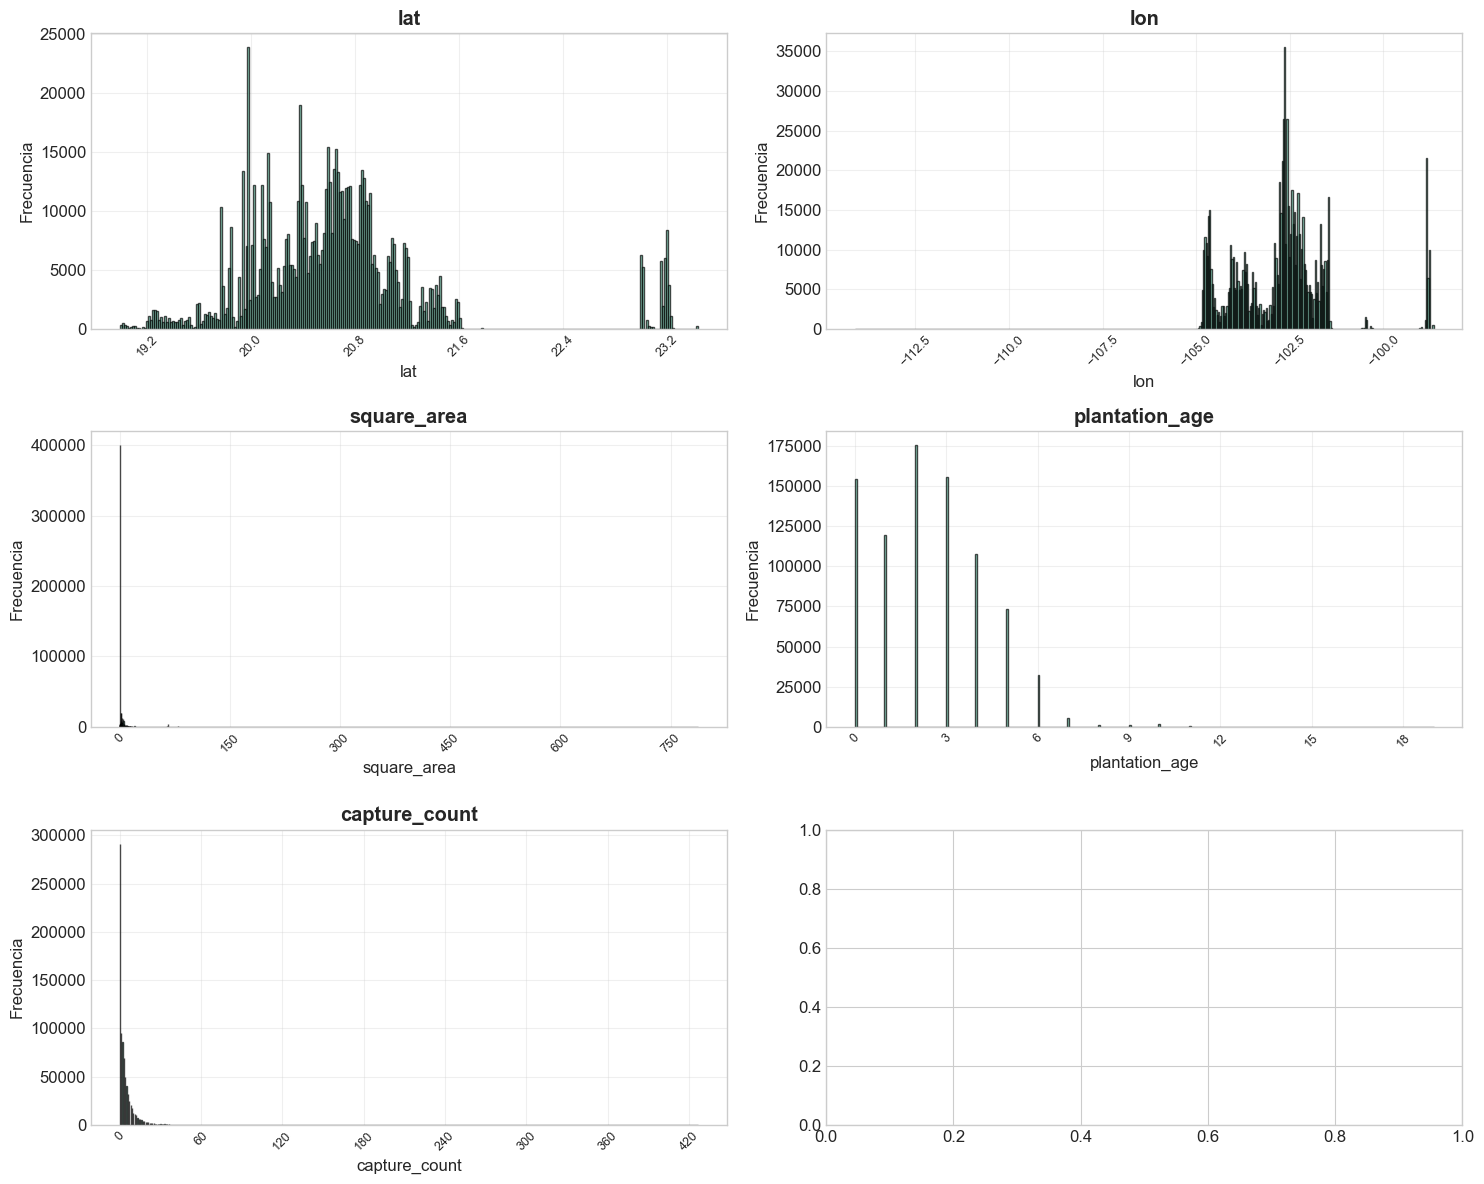

In [13]:
from matplotlib.ticker import MaxNLocator

numeric_columns = all_historic_captures_df.select_dtypes(include=['number']).columns

cols = len(numeric_columns)
rows = int(np.ceil(np.sqrt(cols)))
subplot_count = int( np.ceil(cols / rows))

fig, axes = plt.subplots(rows, subplot_count, figsize=(15,12))
axes_flat = axes.flatten() if cols > 1 else [axes]

for i, col in enumerate(numeric_columns):
    
    ax = axes_flat[i]
    data_to_show = all_historic_captures_df[col].dropna()
    ax.hist(data_to_show, bins= 'auto', alpha = 0.7, edgecolor='black')
    
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    
    ax.xaxis.set_major_locator(MaxNLocator (nbins=8))
    ax.tick_params(axis= 'x', rotation=45, labelsize=9)
    ax.grid(True, alpha=0.3)
    

plt.tight_layout()
plt.show()

Con los diagramas anteriores, notamos que existen varios features con valores atípicos bastante marcados, en los cuáles podemos destacar a `square_area`, `plantation_age` y `capture_count`.

Por lo tanto, procedemos a generar los respectivos boxplots para confirmar lo anterior.

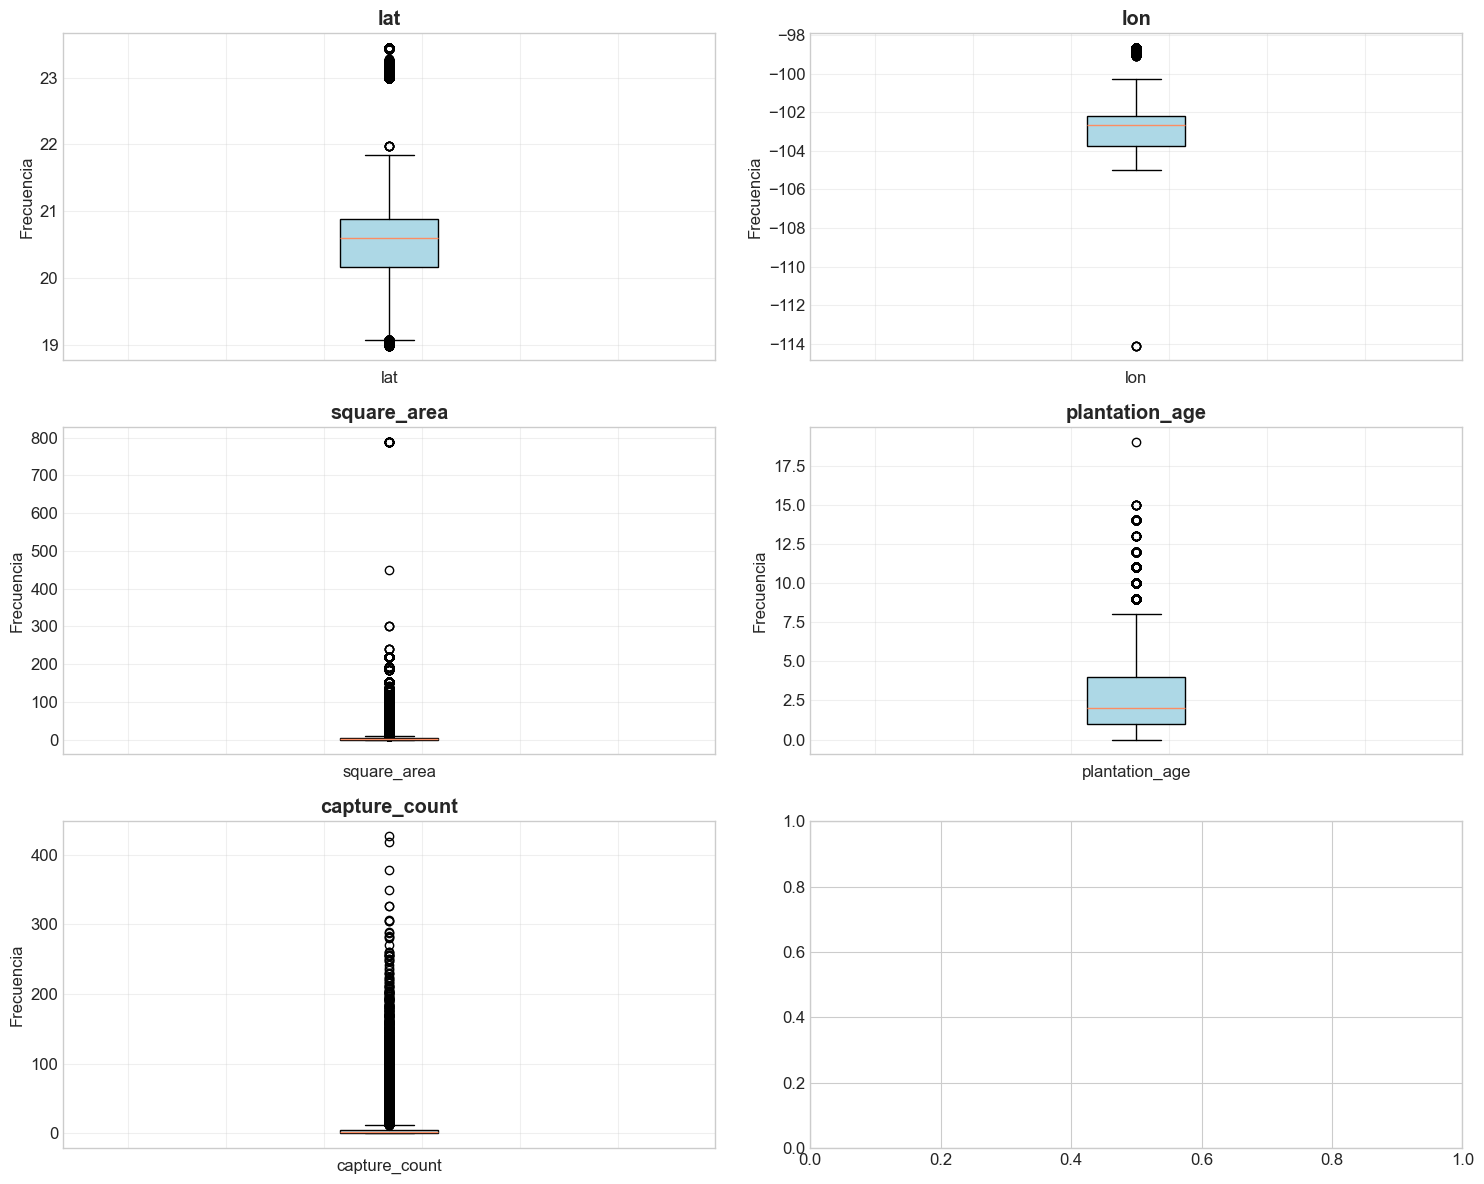

In [14]:
BoxPlot_fig, BoxPlot_axes = plt.subplots(rows, subplot_count, figsize=(15,12))
BoxPlot_axes_flat = BoxPlot_axes.flatten() if cols > 1 else [BoxPlot_axes]

for i, col in enumerate(numeric_columns):
    
    ax = BoxPlot_axes_flat[i]
    data_to_show = all_historic_captures_df[col].dropna()
    ax.boxplot(data_to_show, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"))
    
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    
    ax.xaxis.set_major_locator(MaxNLocator (nbins=8))
    ax.tick_params(axis= 'x', rotation=45, labelsize=9)
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

En este caso, no consideramos eliminar los valores atípicos de `capture_count` y `square_area`, ya que podríamos cambiar la distribución de nuestro dataset.

Con esto, el candidato para eliminar los valores atípicos u outliers es `plantation_age`, ya que nuestro Sponsor confirmó que, por experiencia, es demasiado extraño que un predio de agave supere los 5 a 8 años con la misma plantación, lo que se note en la distribución mostrada anteriormente.

Como es posible observar, el valor de 8.5 años sería el valor límite que podríamos usar para deshacernos de los valores atípicos en nuestro dataset respecto a la edad de las plantaciones. Esto lo estaremos explorando más adelante en el análisis.

In [15]:
# El siguiente código permite quitar los outliers detectados en la variable `capture_count` (cantidad de gorgojos encontrados dentro de las trampas).
# No recomendamos eliminar estos outliers, ya que esto reduce los valores de la columna 'Sema' o severidad a solo 2 categorías. Estas
# categorías fueron definidas por la SICAFI y por lo tanto lo mejor es tenerlas en cuenta.

# q1 = all_historic_captures_df['capture_count'].quantile(0.25)
# q3 = all_historic_captures_df['capture_count'].quantile(0.75)
# IQR = q3 - q1

# lower_limit = q1 - 1.5*IQR
# upper_limit = q3 + 1.5*IQR


# outliers_df = all_historic_captures_df[ (all_historic_captures_df['capture_count'] < lower_limit) | (all_historic_captures_df['capture_count'] > upper_limit ) ]
# all_historic_captures_df = all_historic_captures_df[ (all_historic_captures_df['capture_count'] >= lower_limit) & (all_historic_captures_df['capture_count'] <= upper_limit ) ]

También procedemos a trabajar los Pairplots de variables numéricas para tener una idea de la distribución. Más adelante contamos con una versión en la cual es posible comparar las agrupaciones de datos según la severidad de cada muestra.

Dicha `severidad` se encuentra definida de la siguiente forma:

- `0`: lo cual se muestra en registros donde no se encontraron gorgojos en la trampa revisada por al menos 15 días.
- `1-25`: lo que se toma como una severidad leve (esto sugiere que el promedio de capturas diarias es un máximo de 2 gorgojos al día aproximadamente, por 15 días ).
- `25-75`: lo que se toma como una severidad media, con entre 2 a 4 gorgojos capturados en promedio diariamente por 15 días.
- `75+`: lo que se considera como un foco de infección, tomando en cuenta un promedio de  5 capturas diarias por 15 días.

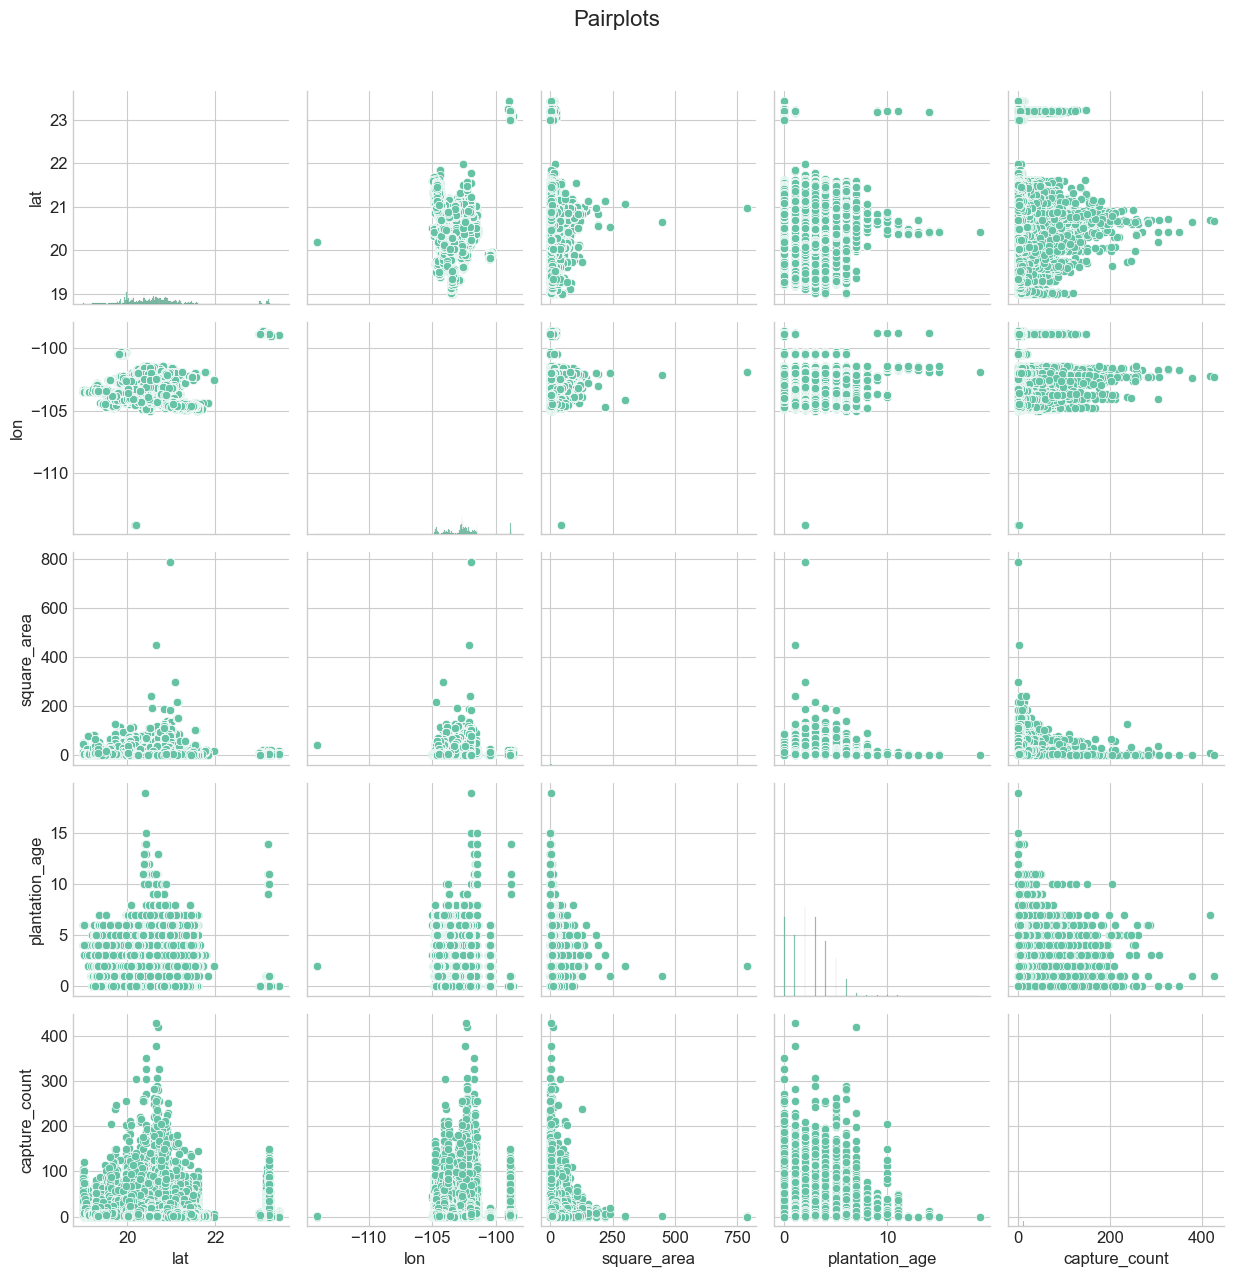

In [16]:
import warnings
warnings.filterwarnings("ignore", message=".*palette.*hue.*")

plots = sns.pairplot(all_historic_captures_df[numeric_columns], palette='dark')

for i in range(len(plots.axes)):
    for j in range(len(plots.axes)):
        
        if i == len(plots.axes)-1:
            col_name = plots.axes[i,j].get_xlabel()
            plots.axes[i,j].set_xlabel(f"{col_name}")
            
        if j == 0:
            col_name = plots.axes[i,j].get_ylabel()
            plots.axes[i,j].set_ylabel(f"{col_name}")
            
plt.suptitle('Pairplots', y=1.02, fontsize=16)
plt.tight_layout()

## Vemos si existe alguna correlación (Pearson) de las variables numéricas...

<Axes: >

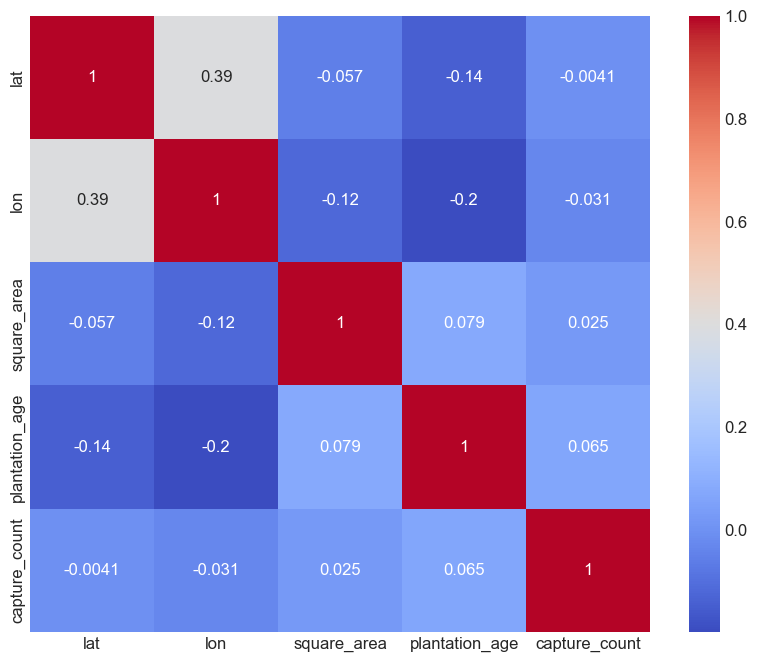

In [17]:
corr = all_historic_captures_df[numeric_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Al revisar las correlaciones, notamos que no existe algua correlación fuerte entre alguna de nuestras variables numéricas, por lo que podemos proseguir con todas éstas para analizar el patrón de las mismas.

## Variables categóricas

In [18]:
all_historic_captures_df.describe(exclude=["number"]).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
tramp_id,827856.0,84063.0,716.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
sampling_date,827856,NaN,NaN,NaN,2018-12-29 19:19:48.102277888,2014-01-01 00:00:00,2016-05-19 00:00:00,2017-11-10 00:00:00,2021-12-28 00:00:00,2025-08-31 00:00:00
municipality,827856,282,Arandas,60857,NaN,NaN,NaN,NaN,NaN,NaN
state,827856,9,JALISCO,331660,NaN,NaN,NaN,NaN,NaN,NaN
severity,827856,5,1-25,518659,NaN,NaN,NaN,NaN,NaN,NaN


En esta sección solo usaremos la función `Describe`, ya que más adelante en el notebook separamos el análsis tomando en cuenta:

- Líneas de tiempo.
- Factores de la plantación (municipalidad, estado)

## Debemos asegurarnos que todas las fechas sean válidas

In [19]:
if all_historic_captures_df['sampling_date'].dtype != 'datetime64[ns]':
    all_historic_captures_df['sampling_date'] = pd.to_datetime(all_historic_captures_df['sampling_date'])

# Aprovechamos a obtener las columnas de mes, año, mes-año y nombre del mes
all_historic_captures_df['Month']       = all_historic_captures_df['sampling_date'].dt.month
all_historic_captures_df['Year']        = all_historic_captures_df['sampling_date'].dt.year
all_historic_captures_df['MonthName']   = all_historic_captures_df['sampling_date'].dt.strftime('%b')
all_historic_captures_df['MonthYear']   = all_historic_captures_df['sampling_date'].dt.strftime('%Y-%m')

## Debemos validar que la edad de las plantaciones y el área sean valores permitidos

In [20]:
if 'plantation_age' in all_historic_captures_df.columns:
        all_historic_captures_df['plantation_age_group'] = all_historic_captures_df['plantation_age'].apply( lambda x: int(x) if pd.notna(x) and isinstance(x, (int, float)) else '-1')
        
if 'square_area' in all_historic_captures_df.columns:
        bins = [0, 1, 2, 5, 10, 20, float('inf')]
        labels = ['<1', '1-2', '2-5', '5-10', '10-20', '>20']
        all_historic_captures_df['surface_group'] = pd.cut(all_historic_captures_df['square_area'], bins=bins, labels=labels)

## Distribución de las capturas

Generamos algunas funciones que nos permitirán no escribir tanto código con cada una de los diagramas siguientes.

In [21]:
def create_seaborn_histogram( data_to_plot, title, xlabel_name, ylabel_name ):
    
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data_to_plot)
    plt.title(title)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    
def create_seaborn_bars(data_to_show, title, xlabel_cats, ylabel_name):
    
    plt.subplot(2, 2, 1)
    
    plt.bar(xlabel_cats, data_to_show)
    plt.title(title)
    plt.ylabel(ylabel_name)

### Verificamos de nuevo la distribución de las capturas según su frecuencia.

En este punto es importante notar que ya sabíamos que existe una cantidad considerable de outliers respecto al feature `capture_count` o `No. de capturas` en el dataset original. Por lo mismo, decidimos revisar también solo aquellos valores que estuvieran por debajo del 95 percentil.

Esto nos permite tener una mejor idea de qué es lo "normal" en la distribución de esta variable.


Estadísticas sobre capturas:


count    827856.000000
mean          4.264352
std           8.156295
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max         427.000000
Name: capture_count, dtype: float64


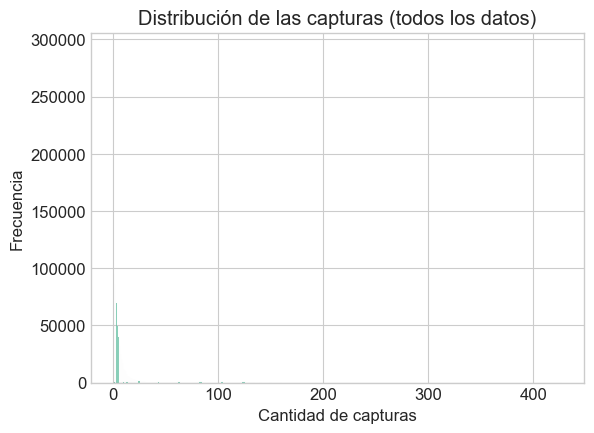

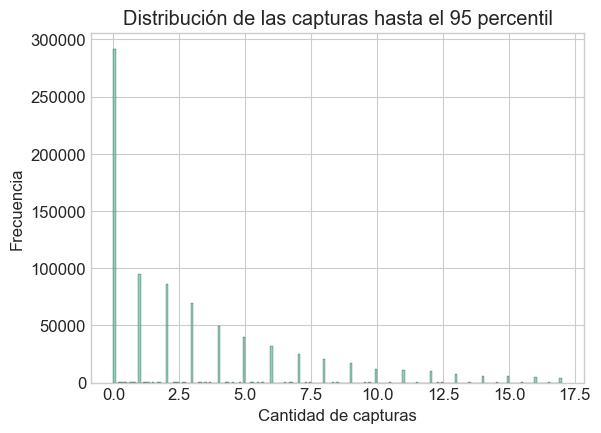

In [22]:
capture_stats = all_historic_captures_df['capture_count'].describe()
print("\nEstadísticas sobre capturas:\n\n")
print(capture_stats)

percentile_95 = np.percentile(all_historic_captures_df['capture_count'].dropna(), 95)

create_seaborn_histogram( all_historic_captures_df['capture_count'], 
            'Distribución de las capturas (todos los datos)', 
            'Cantidad de capturas',
            'Frecuencia')

create_seaborn_histogram( all_historic_captures_df[all_historic_captures_df['capture_count'] <= percentile_95]['capture_count'], 
            'Distribución de las capturas hasta el 95 percentil', 
            'Cantidad de capturas',
            'Frecuencia')

También es importante conocer si tenemos algún balance respecto a si en todos los sitios fue posible encontrar gorgojos del agave. Esto puede darnos una idea general de qué tan severo podría ser el cuadro de infección de los predios a nivel general.

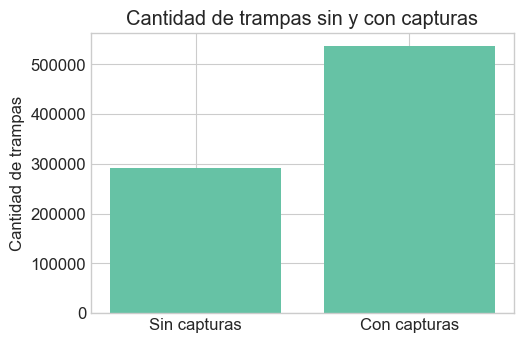

In [23]:
# Lugares con cero capturas vs. más de cero capturas
no_captures = (all_historic_captures_df['capture_count'] == 0).sum()
with_captures = (all_historic_captures_df['capture_count'] > 0).sum()

create_seaborn_bars([no_captures, with_captures],
                    'Cantidad de trampas sin y con capturas',
                    ['Sin capturas', 'Con capturas'],
                    'Cantidad de trampas')

Como generamos nuevas columnas numéricas (`Month` y `Year`), procedemos a ver la distribución de las capturas en el tiempo.

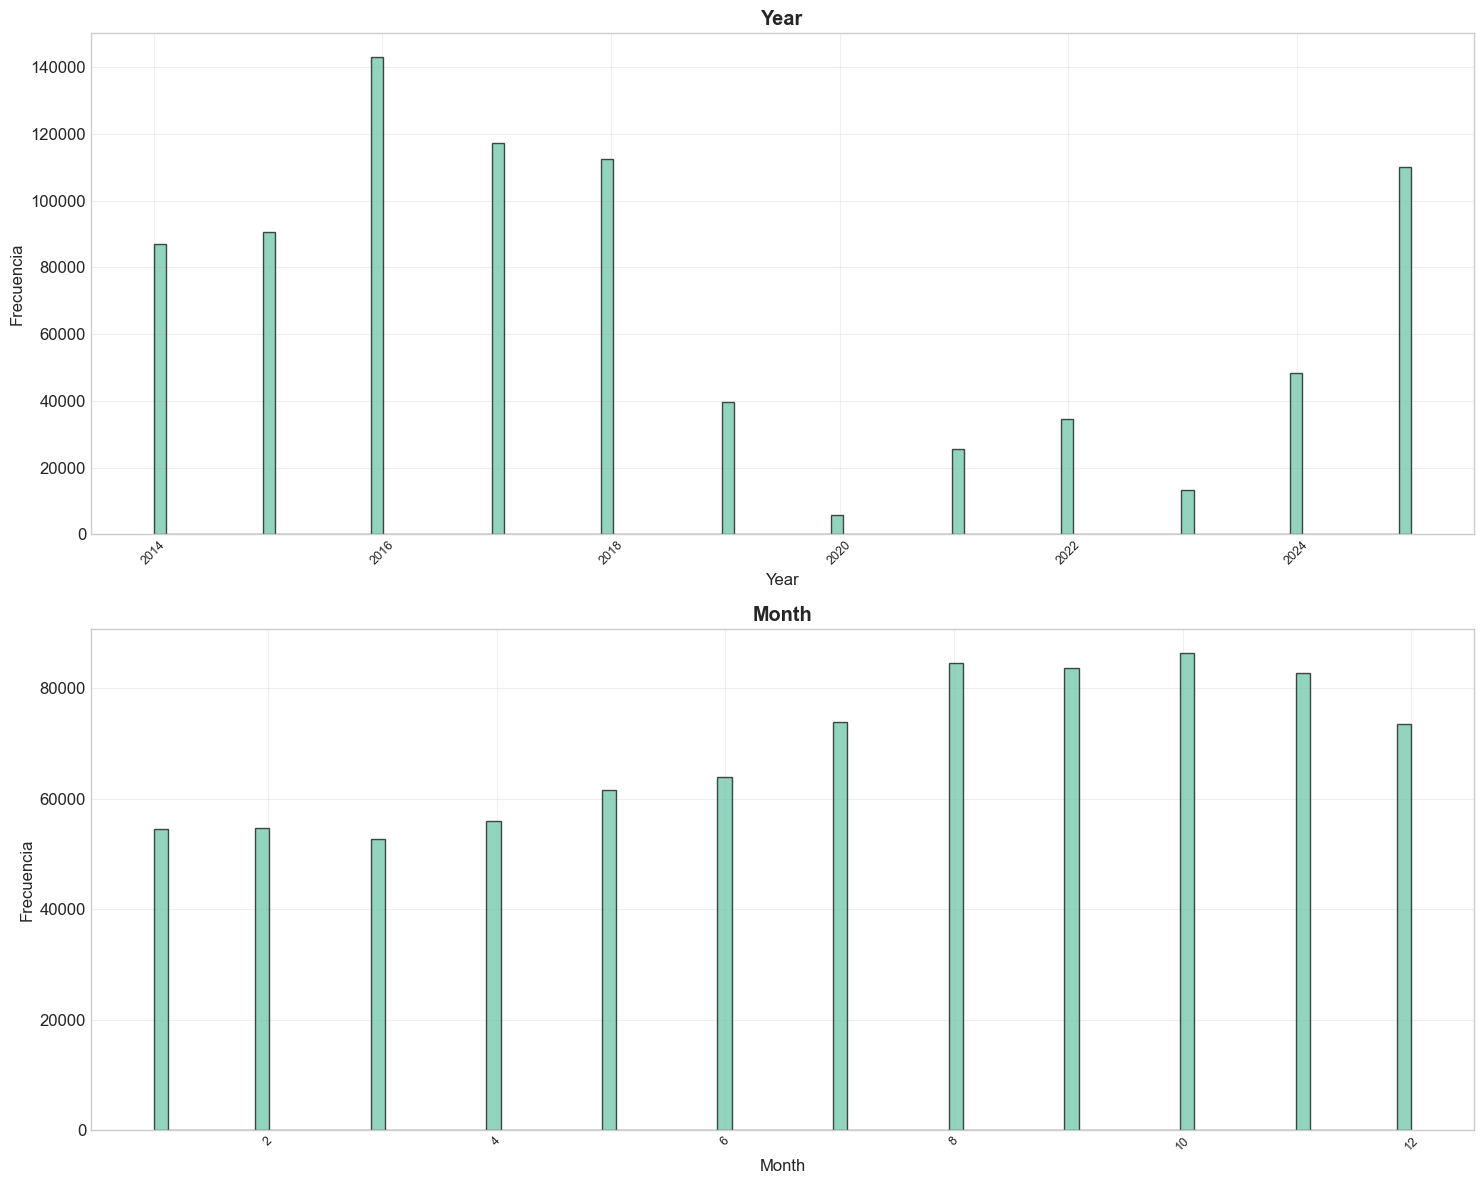

In [24]:
from matplotlib.ticker import MaxNLocator

year_month_cols = [ 'Year', 'Month']

cols = len(year_month_cols)
rows = int(np.ceil(np.sqrt(cols)))
subplot_count = int( np.ceil(cols / rows))

fig, axes = plt.subplots(rows, subplot_count, figsize=(15,12))
axes_flat = axes.flatten() if cols > 1 else [axes]

for i, col in enumerate(year_month_cols):
    
    ax = axes_flat[i]
    data_to_show = all_historic_captures_df[col].dropna()
    ax.hist(data_to_show, bins= 'auto', alpha = 0.7, edgecolor='black')
    
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    
    ax.xaxis.set_major_locator(MaxNLocator (nbins=8))
    ax.tick_params(axis= 'x', rotation=45, labelsize=9)
    ax.grid(True, alpha=0.3)
    

plt.tight_layout()
plt.show()

Con lo que es importante resaltar 2 cosas:

- El efecto pandemia fue bastante notorio en la obtención de muestras, ya que del primer trimestre de 2019 a aproximadamente el año 2024 tenemos un reducción significativa en el muestreo de gorgojos en cada trampa instalada. Esto fue confirmado por nuestro sponsor, ya que debido a COVID-19 no era posible llevar a cabo el muestreo en campo.

- Existe un aumento en la cantidad de gorgojos hallados a partir de Junio hasta Diciembre. Al platicar con nuestro sponsor sobre esto, nos confirmó que lograron confirmar la correlación entre el inicio de la época de lluvia, lo que comprende la ventana de tiempo desde finales de Mayo hasta Diciembre. 
  - El aumento de capturas es considerable, y esto se atribuye a que las lluvias favorecen el desarrollo del ciclo de vida del gorgojo y lo obliga también a moverse más. Esto último es algo debatible aún, ya que no se cuenta con información como la temperatura, precipitación y humedad aún en nuestro dataset.

<Figure size 1400x800 with 0 Axes>

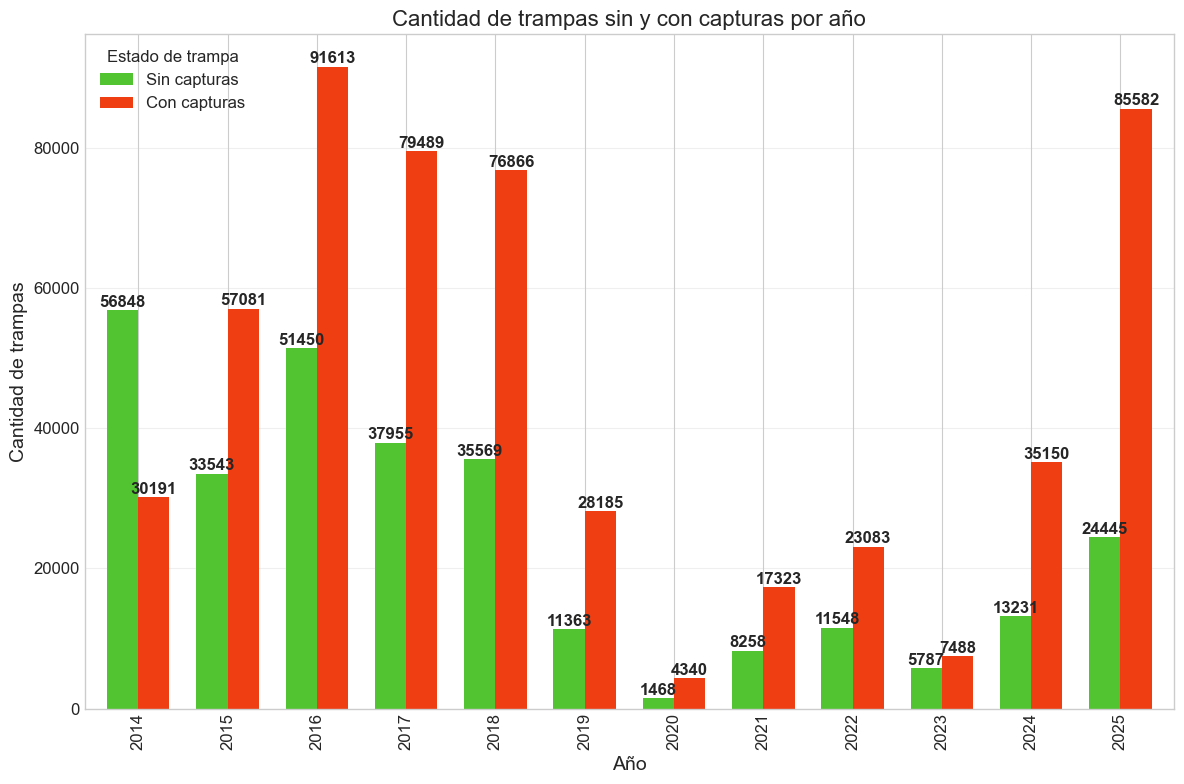

In [25]:
yearly_capture_stats = []

years = sorted(all_historic_captures_df['Year'].unique())

for year in years:
    year_data = all_historic_captures_df[all_historic_captures_df['Year'] == year]
    no_captures = (year_data['capture_count'] == 0).sum()
    with_captures = (year_data['capture_count'] > 0).sum()
    yearly_capture_stats.append([year, no_captures, with_captures])

all_historic_captures_state = pd.DataFrame(yearly_capture_stats, 
                         columns=['Year', 'Sin capturas', 'Con capturas'])

all_historic_captures_state.set_index('Year', inplace=True)

plt.figure(figsize=(14, 8))
all_historic_captures_state.plot(kind='bar', stacked=False, width=0.7, color=["#53c431", "#ee3e12"])

for i, col in enumerate(['Sin capturas', 'Con capturas']):
    for j, value in enumerate(all_historic_captures_state[col]):
        plt.text(j + (i-0.5)*0.35, value + 50, f'{int(value)}', 
                 ha='center', va='bottom', fontweight='bold')

plt.title('Cantidad de trampas sin y con capturas por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de trampas', fontsize=14)
plt.legend(title='Estado de trampa')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

Respecto a la cantidad de trampas con capturas y sin capturas, vemos que históricamente es más probable encontrar gorgojos en las trampas a no hacerlo. Esta tendencia se mantuvo incluso entre el año 2019 y 2024, que es donde se comprende le período de afectación por la pandemia provocada por COVID-19.

## Análisis geográfico

In [26]:
# Funciones que ayudarán a generar gráficos y ahorrarnos código.


def aggregation(data_to_use, group_by):
    
    data_to_show = data_to_use.groupby(f'{group_by}').agg(
        avg_captures = ('capture_count', 'mean'),
        max_captures=('capture_count', 'max'),
        total_captures=('capture_count', 'sum'),
        trap_count=('tramp_id', 'count')
    )
    
    return data_to_show


def  aggregation_bar_chart(x_values, y_values, data_to_show, title, xlabel, ylabel):
    
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    sns.barplot(x=x_values.index, y=f'{y_values}', data= data_to_show.reset_index())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    

### Por Municipalidad

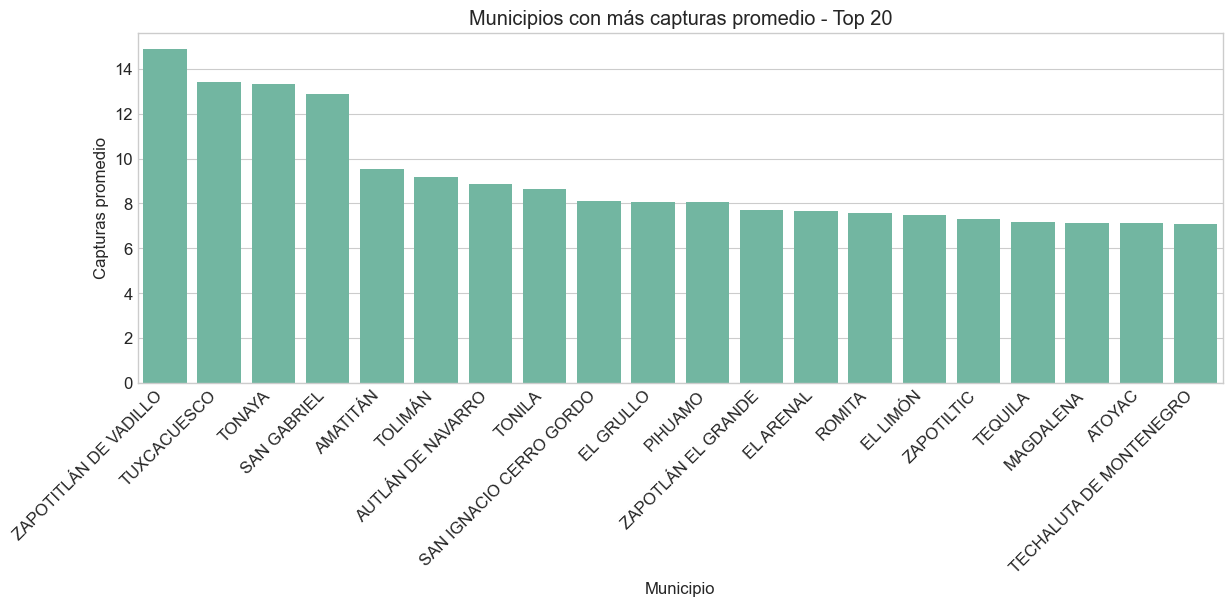

In [27]:
all_historic_captures_df['municipality'] = all_historic_captures_df['municipality'].str.upper()

municipality_data = aggregation(all_historic_captures_df, 'municipality').sort_values('avg_captures', ascending=False)
top_municipalities = municipality_data.head(20)

aggregation_bar_chart( top_municipalities, 
                      'avg_captures', 
                      top_municipalities.reset_index(), 
                      'Municipios con más capturas promedio - Top 20',
                      'Municipio',
                      'Capturas promedio')


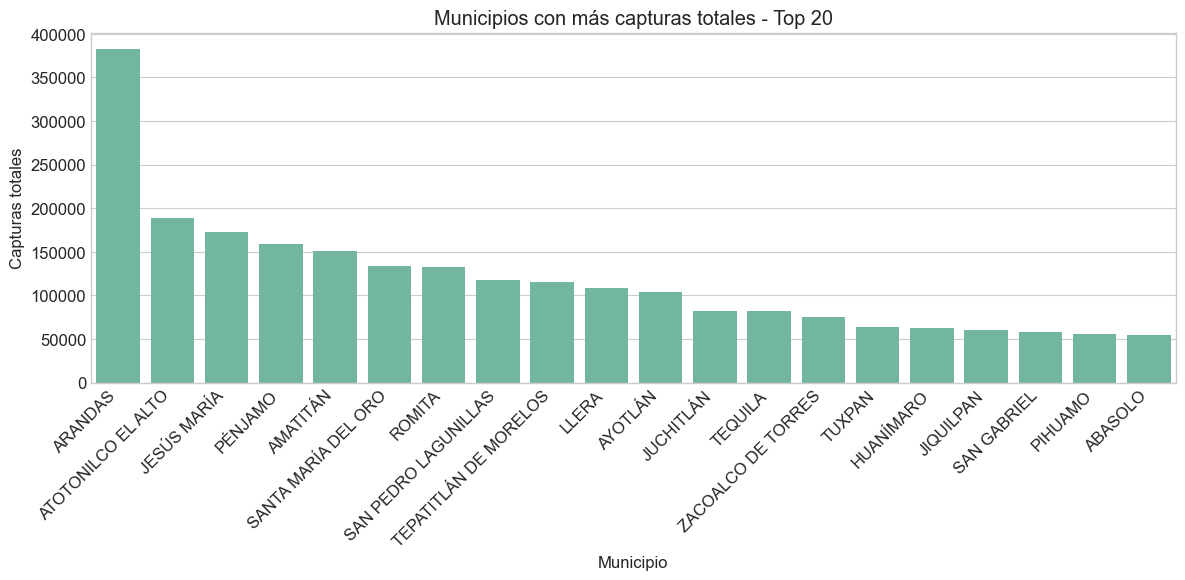

In [28]:
municipality_data = aggregation(all_historic_captures_df, 'municipality').sort_values('total_captures', ascending=False)
top_municipalities = municipality_data.head(20)

aggregation_bar_chart( top_municipalities, 
                      'total_captures', 
                      top_municipalities.reset_index(), 
                      'Municipios con más capturas totales - Top 20',
                      'Municipio',
                      'Capturas totales')

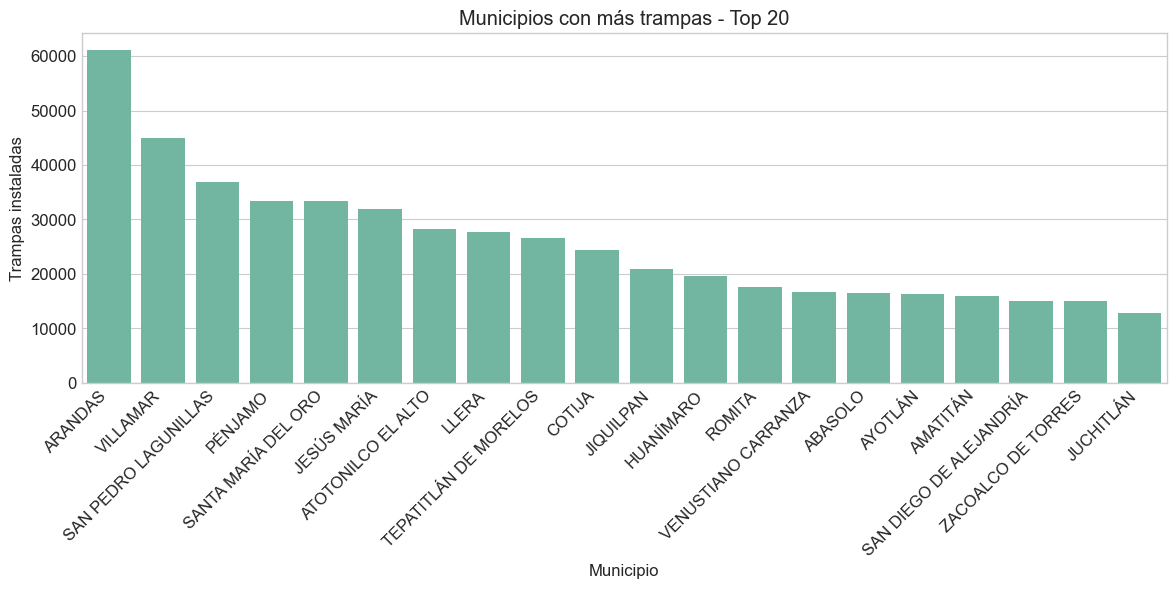

In [29]:
municipality_data = aggregation(all_historic_captures_df, 'municipality').sort_values('trap_count', ascending=False)
top_municipalities = municipality_data.head(20)

aggregation_bar_chart( top_municipalities, 
                      'trap_count', 
                      top_municipalities.reset_index(), 
                      'Municipios con más trampas - Top 20',
                      'Municipio',
                      'Trampas instaladas')

Con estos diagramas es posible confirmar que:

- El municipio con más trampas instaladas, que en este caso es `ARANDAS`, cuenta también con más capturas registradas. Sin embargo, esta tendencia no se encontró con algún otro municipio.
  - Agregado a esto, nos llama la atención que el promedio de capturas en `ARANDAS` no se encuentre entre el Top 20 de municipios con más capturas en promedio.

- Zapotitlán de Vadillo cuenta con más capturas en promedio, esto a pesar de que no cuenta con una densidad de trampas dentro del Top 20 de municipios con más trampas. Esto parece sugerir que la densidad de la distribución de las trampas se trabajó de mejor manera, o bien, que la población de gorgojos del agave es simplemente más densa en esta zona.

### Por Estado

Existen 5 Estados que aportan información a este dataset, pero hay un Estado que se encuentra representado con 2 distintos valores: `Michoacan` y `Michoacan de Ocampo`.

Por lo anterior, procedimos a unificar estos valores a uno solo.

In [52]:
print(f'Valores únicos de Estado: {all_historic_captures_df['state'].unique()}')
all_historic_captures_df['state'] = all_historic_captures_df['state'].replace('MICHOACÁN DE OCAMPO', 'MICHOACAN')
print(f'Valores únicos de Estado después de modificar a Michoacán: {all_historic_captures_df['state'].unique()}')

Valores únicos de Estado: ['GUANAJUATO' 'JALISCO' 'MICHOACAN' 'NAYARIT' 'TAMAULIPAS']
Valores únicos de Estado después de modificar a Michoacán: ['GUANAJUATO' 'JALISCO' 'MICHOACAN' 'NAYARIT' 'TAMAULIPAS']


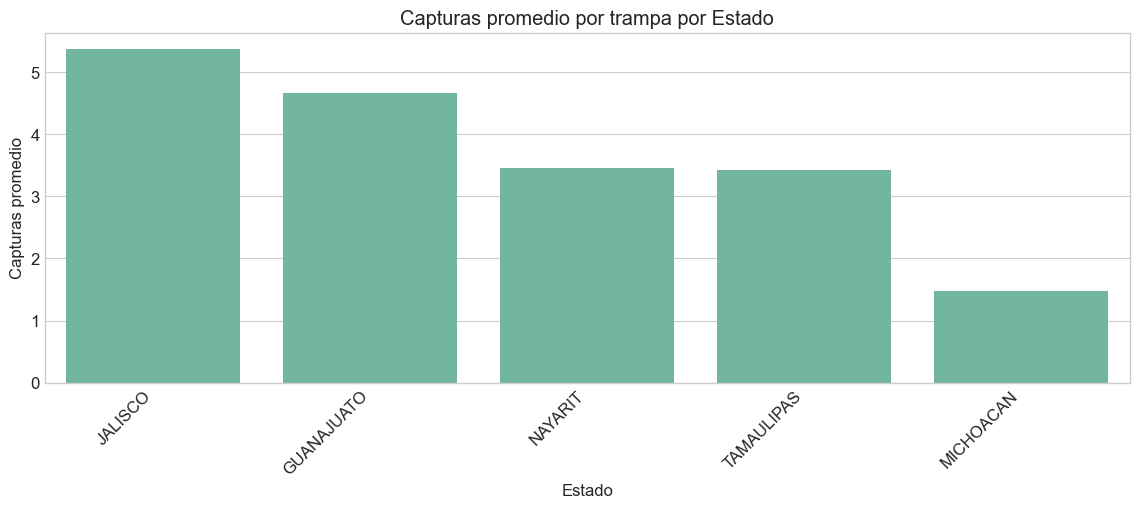

In [57]:
all_historic_captures_df['state'] = all_historic_captures_df['state'].str.upper()

state_data = aggregation(all_historic_captures_df, 'state').sort_values('avg_captures', ascending=False)
top_states = state_data.head(20)

aggregation_bar_chart( top_states, 
                      'avg_captures', 
                      top_states.reset_index(), 
                      'Capturas promedio por trampa por Estado',
                      'Estado',
                      'Capturas promedio')

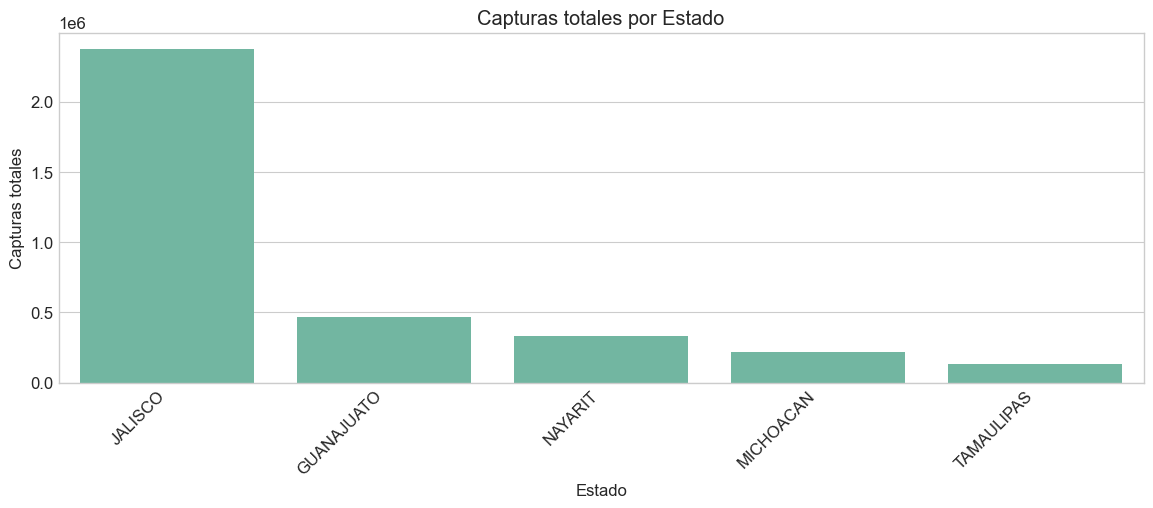

In [58]:
state_data = aggregation(all_historic_captures_df, 'state').sort_values('total_captures', ascending=False)
top_states = state_data.head(20)

aggregation_bar_chart( top_states, 
                      'total_captures', 
                      top_states.reset_index(), 
                      'Capturas totales por Estado',
                      'Estado',
                      'Capturas totales')

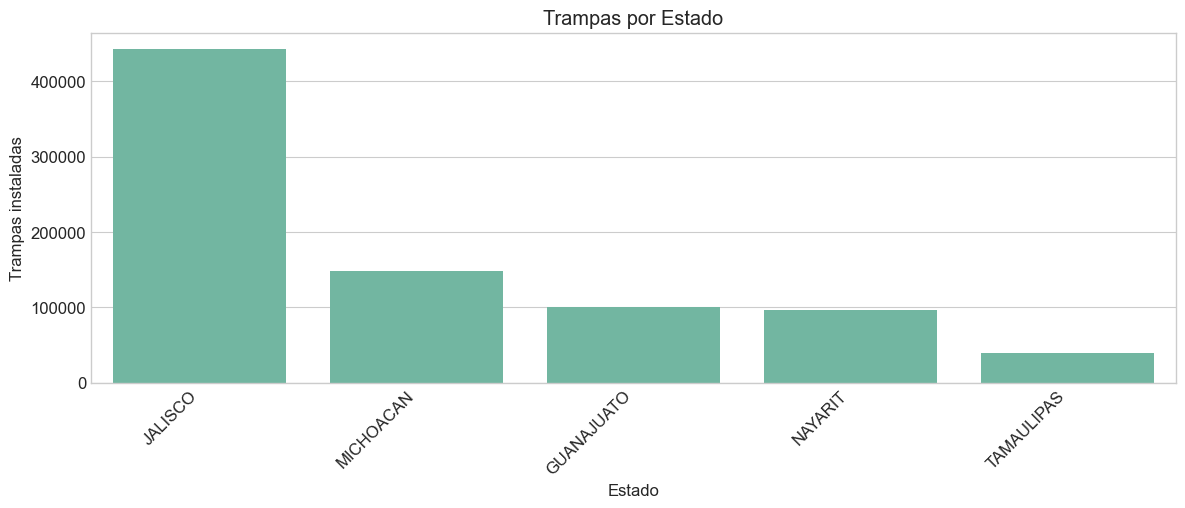

In [59]:
state_date = aggregation(all_historic_captures_df, 'state').sort_values('trap_count', ascending=False)
top_state = state_date.head(20)

aggregation_bar_chart( top_state, 
                      'trap_count', 
                      top_state.reset_index(), 
                      'Trampas por Estado',
                      'Estado',
                      'Trampas instaladas')

En general, notamos que `Jalisco` es el estado que:

- Más capturas promedio y total ha registrado (esto se alinea a que Arandas, parte de Jalisco, sea el municipio con más capturas).
- Tiene una diferencia significativa respecto a otros estados en cuánto a la cantidad de gorgojos atrapados y trampas instaladas.
- A pesar de lo anterior, el promedio de capturas por trampa se mantiene bastante similar al resto de Estados (la mayor diferencia es respecto a Michoacán).

## Análisis temporal

In [76]:
# Por mes

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_data = aggregation(all_historic_captures_df, "Month")
monthly_data['MonthName'] = [month_names.get(m, m) for m in monthly_data.index]

print("\nPatrones de captura mensuales:")
print(monthly_data[['avg_captures', 'max_captures', 'total_captures', 'trap_count']])


Patrones de captura mensuales:
       avg_captures  max_captures  total_captures  trap_count
Month                                                        
1          3.939560         256.0   214698.159221       54498
2          3.418958         193.0   186661.435005       54596
3          3.831366         255.0   202208.000000       52777
4          3.020749         148.0   168881.000000       55907
5          3.076903         212.0   189288.000000       61519
6          4.686176         305.0   299606.000000       63934
7          3.822519         212.0   282197.500000       73825
8          3.141616         327.0   265498.000000       84510
9          3.830808         288.0   320336.000000       83621
10         4.926223         305.0   425271.000000       86328
11         5.800916         378.0   480049.000000       82754
12         6.734546         427.0   495575.000000       73587


Text(0, 0.5, 'Promedio de capturas')

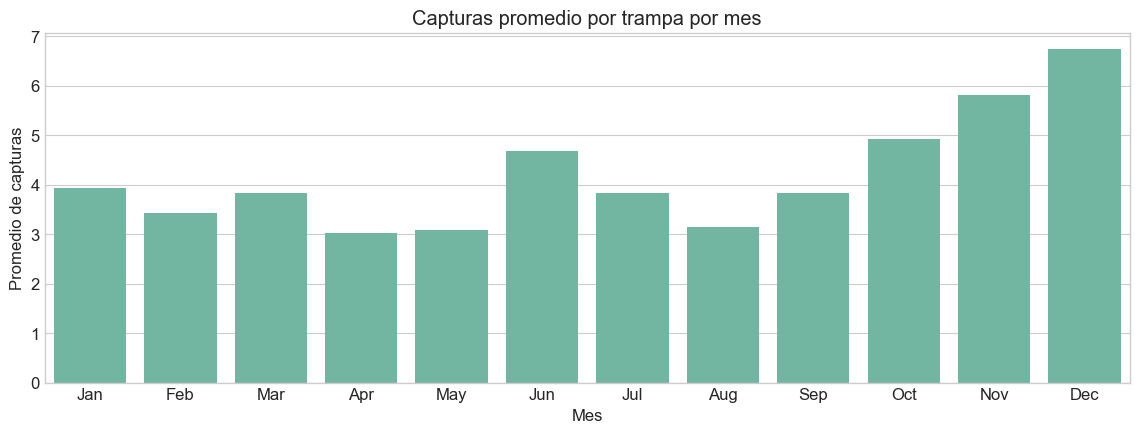

In [77]:
# Por mes-año
monthly_trend = aggregation(all_historic_captures_df, 'MonthYear')

monthly_trend.index = pd.to_datetime(monthly_trend.index, format='%Y-%m')
monthly_trend = monthly_trend.sort_index()

month_order = list(range(1, 13))
month_data = monthly_data.reindex(month_order).reset_index()

plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='MonthName', y='avg_captures', data=month_data, order=[month_names[m] for m in month_order])
plt.title('Capturas promedio por trampa por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de capturas')

Text(0, 0.5, 'Total de capturas')

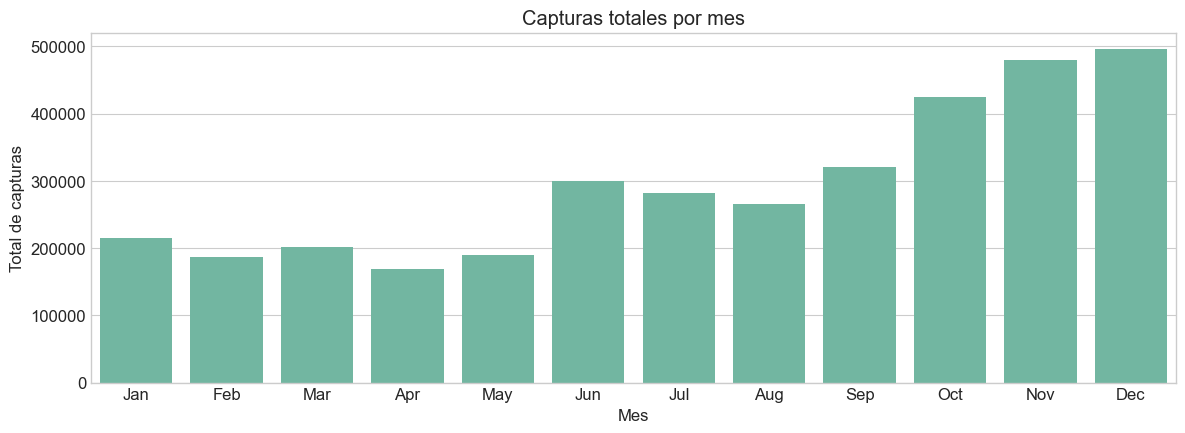

In [78]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
month_order = list(range(1, 13))
month_data = monthly_data.reindex(month_order).reset_index()
sns.barplot(x='MonthName', y='total_captures', data=month_data, order=[month_names[m] for m in month_order])
plt.title('Capturas totales por mes')
plt.xlabel('Mes')
plt.ylabel('Total de capturas')

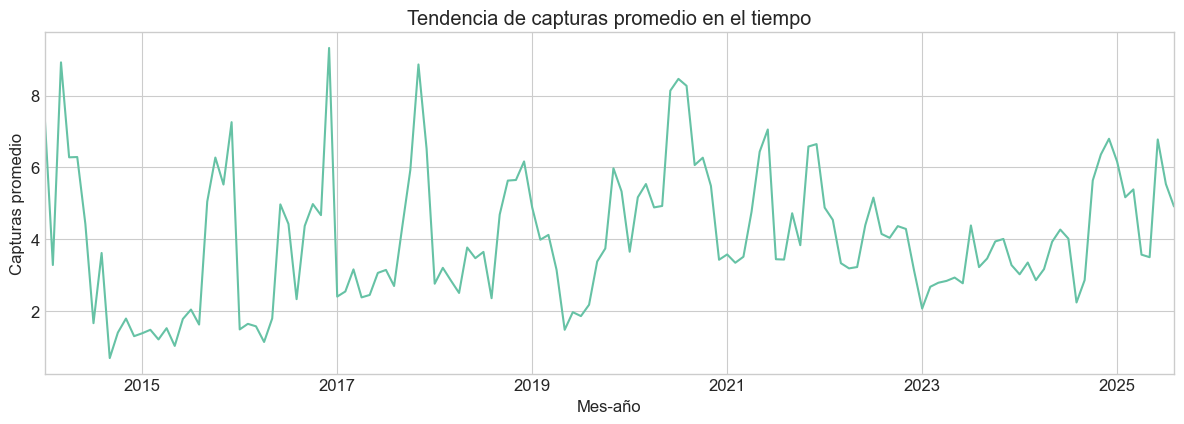

In [79]:
plt.subplot(2, 1, 2)
monthly_trend['avg_captures'].plot()
plt.title('Tendencia de capturas promedio en el tiempo')
plt.xlabel('Mes-año')
plt.ylabel('Capturas promedio')
plt.grid(True)

plt.tight_layout()

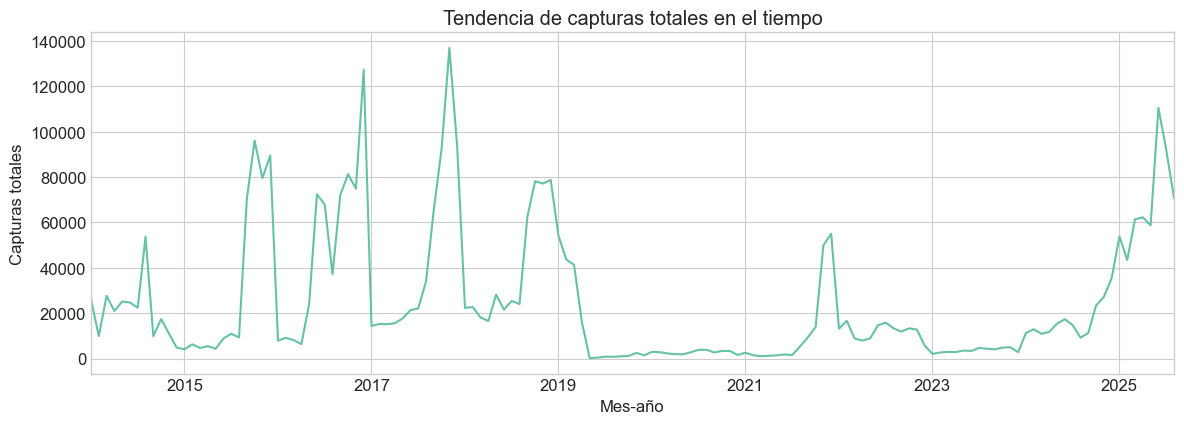

In [66]:
plt.subplot(2, 1, 2)
monthly_trend['total_captures'].plot()
plt.title('Tendencia de capturas totales en el tiempo')
plt.xlabel('Mes-año')
plt.ylabel('Capturas totales')
plt.grid(True)

plt.tight_layout()

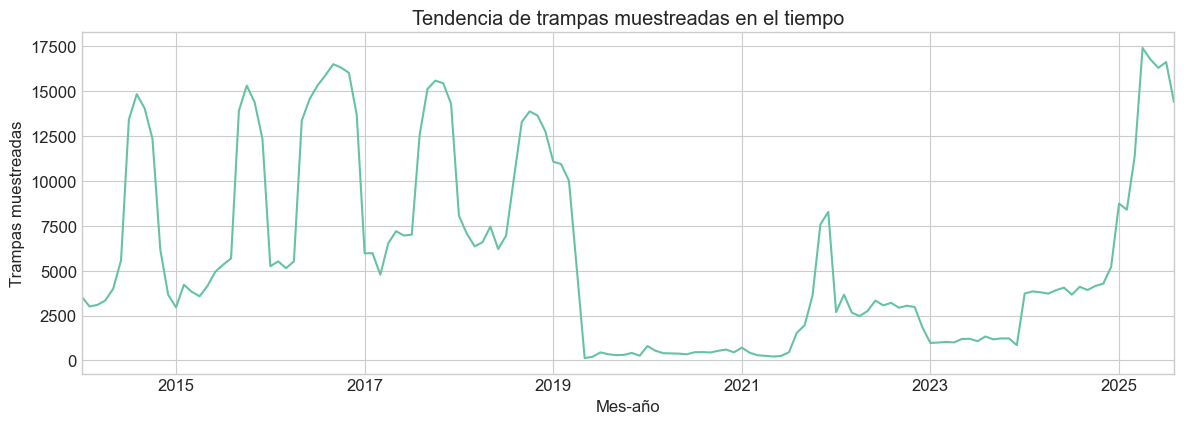

In [67]:
plt.subplot(2, 1, 2)
monthly_trend['trap_count'].plot()
plt.title('Tendencia de trampas muestreadas en el tiempo')
plt.xlabel('Mes-año')
plt.ylabel('Trampas muestreadas')
plt.grid(True)

plt.tight_layout()

En este análisis es posible 

- Notar de nuevo el efecto de la pandemia sobre la información, ya que en todos los años, excepto de 2019 al 2023, es posible notar los repuntes de capturas de gorgojos a partir de Junio hasta Diciembre.
- También podemos encontrar que a partir de 2025 se aumentó el muestreo de trampas, ya que se cuenta con el valor máximo en la cantidad de trampas muestreadas.
- Existe un repunte de trampas instaladas entre el 2021 y 2023, lo que sugiere la reanudación breve del proceso de muestreo durante la pandemia.


## Factores de la plantación

### Edad del predio

In [80]:
# Por antiguedad del predio
    
q1 = all_historic_captures_df['plantation_age'].quantile(0.25)
q3 = all_historic_captures_df['plantation_age'].quantile(0.75)
IQR = q3 - q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

plantation_age_wihtout_outliers = all_historic_captures_df[ (all_historic_captures_df['plantation_age'] > lower_limit) & (all_historic_captures_df['plantation_age'] < upper_limit) ]

print( f'Límite inferior de años para detectar outliers: {lower_limit}')
print( f'Límite superior de años para detectar outliers: {upper_limit}')
print( f'% de muestras que se mantienen sin tomar en cuenta los outliers: { len(plantation_age_wihtout_outliers) / len(all_historic_captures_df) * 100 }')

age_data = aggregation(plantation_age_wihtout_outliers, 'plantation_age')
    
age_data = age_data.reset_index()
age_data = age_data.sort_values('plantation_age')

print("\nCapturas por antiguedad sin outliers:")
print(age_data)

Límite inferior de años para detectar outliers: -3.5
Límite superior de años para detectar outliers: 8.5
% de muestras que se mantienen sin tomar en cuenta los outliers: 99.58833420304981

Capturas por antiguedad sin outliers:
   plantation_age  avg_captures  max_captures  total_captures  trap_count
0             0.0      4.000194         350.0   617586.000000      154389
1             1.0      3.812599         427.0   454713.455556      119266
2             2.0      3.466893         209.0   607527.868488      175237
3             3.0      4.360823         307.0   678709.760209      155638
4             4.0      5.234166         255.0   561924.310761      107357
5             5.0      4.797547         261.0   351957.639819       73362
6             6.0      6.109010         288.0   198274.037172       32456
7             7.0      6.415558         418.0    36504.522222        5690
8             8.0      6.399810          76.0     6739.000000        1053


### Distribución por area de los predios

In [81]:
q1 = all_historic_captures_df['square_area'].quantile(0.25)
q3 = all_historic_captures_df['square_area'].quantile(0.75)
IQR = q3 - q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

plantation_area_without_outliers = all_historic_captures_df[ (all_historic_captures_df['square_area'] > lower_limit) & (all_historic_captures_df['square_area'] < upper_limit) ]

print( f'Límite inferior de area para detectar outliers: {lower_limit}')
print( f'Límite superior de area para detectar outliers: {upper_limit}')
print( f'% de muestras que se mantienen sin tomar en cuenta los outliers de area: { len(plantation_area_without_outliers) / len(all_historic_captures_df) * 100 }')
            
area_data = aggregation(plantation_area_without_outliers, 'square_area')
    
area_data = area_data.reset_index()
area_data = area_data.sort_values('square_area')

print("\nCapturas por area sin outliers:")
print(area_data)

print(
    
    "Cantidad de registros con un area igual a 0 en %: " + str( len(all_historic_captures_df[ all_historic_captures_df['square_area'] == 0 ]) / len(all_historic_captures_df) *100 ) 
    
)

all_historic_captures_df[ all_historic_captures_df['square_area'] == 0 ].sampling_date.describe().T

Límite inferior de area para detectar outliers: -5.9032498605
Límite superior de area para detectar outliers: 9.8387497675
% de muestras que se mantienen sin tomar en cuenta los outliers de area: 88.58859511799153

Capturas por area sin outliers:
       square_area  avg_captures  max_captures  total_captures  trap_count
0           0.0000      3.058933         327.0       1221805.0      399422
1           0.0047      2.166667           4.0             6.5           3
2           0.0047      0.000000           0.0             0.0           1
3           0.0047      0.000000           0.0             0.0           1
4           0.0047      0.777778           4.0             7.0           9
...            ...           ...           ...             ...         ...
19894       9.8361      0.375000           3.0             3.0           8
19895       9.8366     21.333333          28.0            64.0           3
19896       9.8366     32.000000          32.0            32.0           1
198

count                           399422
mean     2016-11-04 16:22:38.803470848
min                2014-01-02 00:00:00
25%                2015-06-05 00:00:00
50%                2016-08-16 00:00:00
75%                2017-12-22 00:00:00
max                2025-06-15 00:00:00
Name: sampling_date, dtype: object

#### Procedemos a verificar las tendencias de los registros con valores en 0.00000...

Text(0, 0.5, 'Capturas')

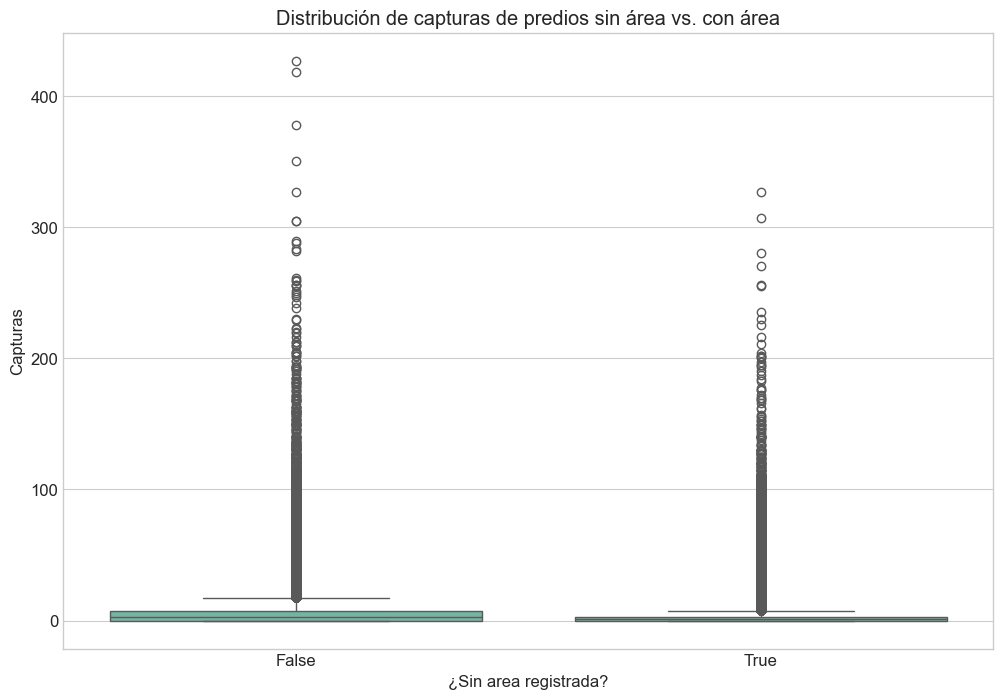

In [82]:
all_historic_captures_df['no_area'] = all_historic_captures_df['square_area'] == 0

sns.boxplot(data= all_historic_captures_df, x='no_area', y='capture_count')
plt.title('Distribución de capturas de predios sin área vs. con área')
plt.xlabel('¿Sin area registrada?')
plt.ylabel('Capturas')

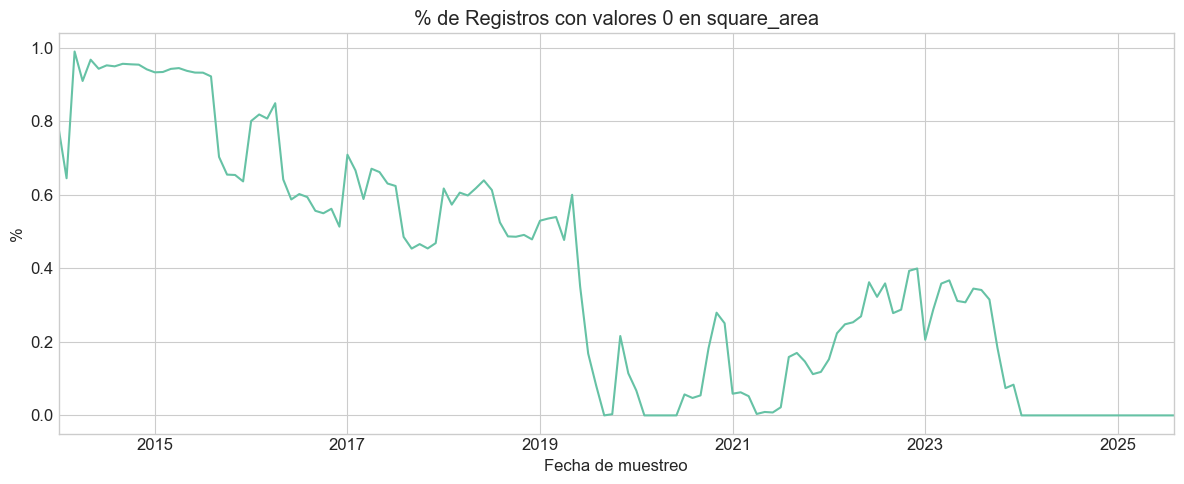

In [83]:
# Proporción de registros con valor 0 en la columna de square_area
monthly_no_area_registers = all_historic_captures_df.groupby(all_historic_captures_df['sampling_date'].dt.to_period('M'))['no_area'].mean()

plt.figure(figsize=(12, 5))
monthly_no_area_registers.plot()
plt.title('% de Registros con valores 0 en square_area')
plt.xlabel('Fecha de muestreo')
plt.ylabel('%')
plt.tight_layout()

Es importante notar que el área de los predios no fue debidamente muestreada desde el año `2014` hasta aproximadamente el año `2020`. Esto sugiere 2 casos probables:

1. El proceso de muestreo y registro de la información sobre el área que abarca un predio no fue el adecuado, ya que por varios años esta información se registró con un valor de `0`.
2. El área de los predios no era un factor importante a registrar durante el muestreo de las trampas.

## Distribución de la severidad (semáforo)

In [84]:
print("Valor únicos de severidad: " + str(all_historic_captures_df['severity'].unique()) )

all_historic_captures_df["severity"] = all_historic_captures_df["severity"].astype(str)

print("Valor únicos de severidad después de pre-procesar la info: " + str(all_historic_captures_df['severity'].unique()) )


Valor únicos de severidad: ['1-25' '0' '25-75' '>75']
Valor únicos de severidad después de pre-procesar la info: ['1-25' '0' '25-75' '>75']


In [85]:
all_historic_captures_df.columns

Index(['tramp_id', 'sampling_date', 'lat', 'lon', 'municipality',
       'square_area', 'plantation_age', 'capture_count', 'state', 'severity',
       'Month', 'Year', 'MonthName', 'MonthYear', 'plantation_age_group',
       'surface_group', 'no_area'],
      dtype='object')

In [86]:
severity_data = aggregation(all_historic_captures_df, 'severity').sort_values('avg_captures', ascending=False)
severity_data

,avg_captures,max_captures,total_captures,trap_count
severity,,,,
>75,110.381369,427.0,1.386390e+05,1256
25-75,37.685015,75.0,6.208983e+05,16476
1-25,5.342107,25.0,2.770732e+06,518659
0,0.000000,0.0,0.000000e+00,291465


<Figure size 1000x800 with 0 Axes>

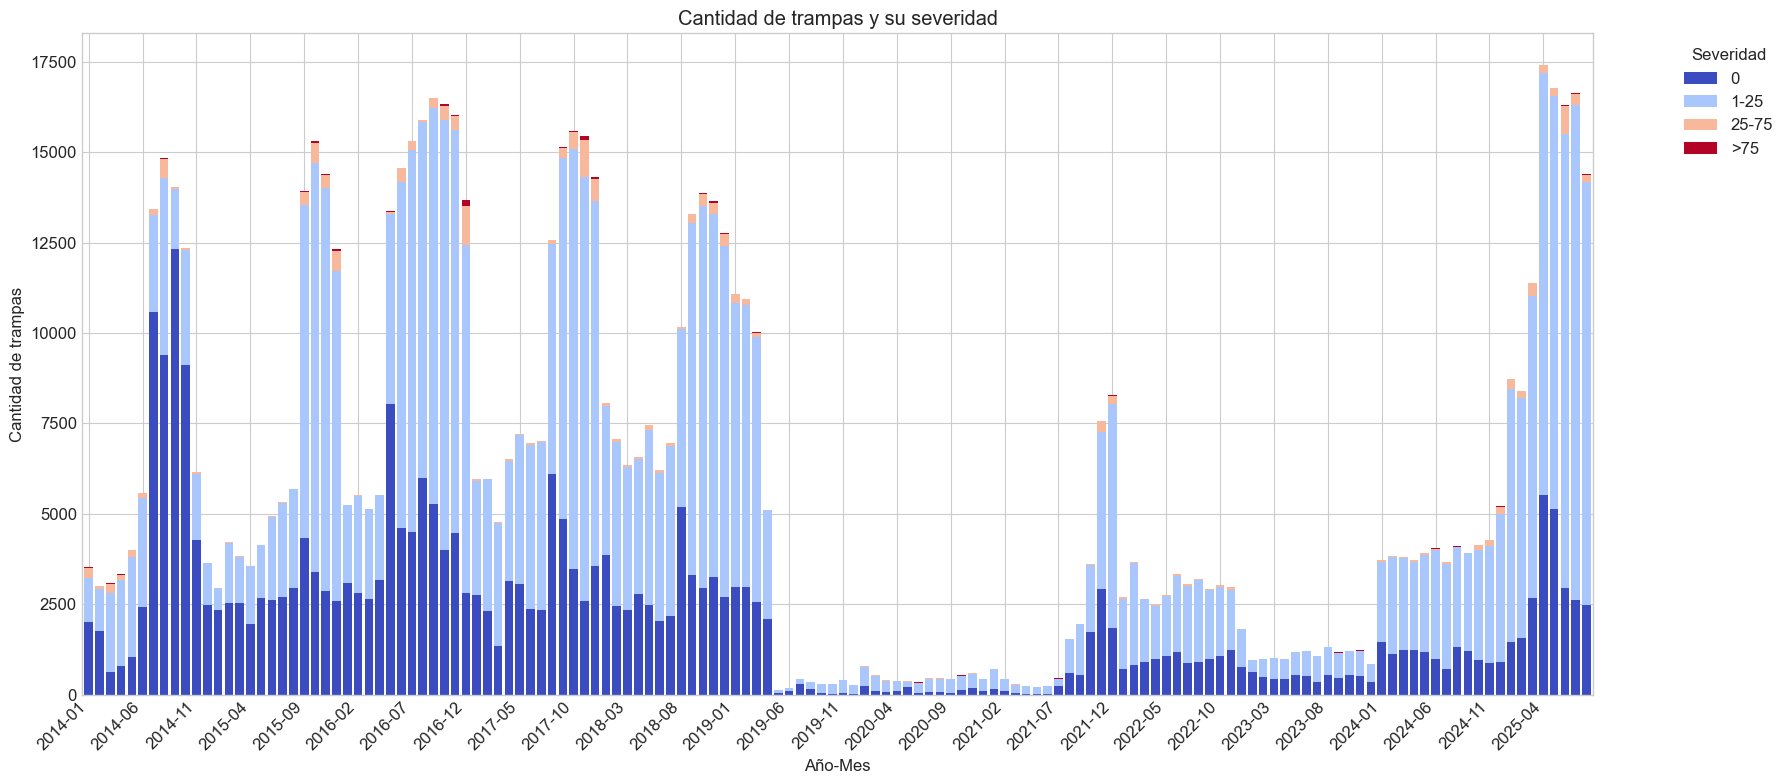

In [87]:
all_historic_captures_df['MonthYear'] = pd.to_datetime(all_historic_captures_df['MonthYear'], format='%Y-%m')

severity_timeline_data = all_historic_captures_df.groupby(['MonthYear', 'severity'])['tramp_id'].count().reset_index()

pivot_data = severity_timeline_data.pivot(index='MonthYear', 
                                          columns='severity', 
                                          values='tramp_id')

pivot_data = pivot_data.sort_index()

plt.figure(figsize=(10, 8))
pivot_data.plot(
    kind='bar', 
    stacked=True,
    colormap='coolwarm',
    width=0.8,
    figsize=(18, 8)
)

plt.title('Cantidad de trampas y su severidad')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de trampas')
plt.legend(title='Severidad', bbox_to_anchor=(1.05, 1), loc='upper left')

tick_frequency = max(1, 5)
ticks = range(0, len(pivot_data.index), tick_frequency)
labels = [str(date.strftime('%Y-%m')) for date in pivot_data.index[::tick_frequency]]


plt.xticks(ticks, labels, rotation=45, ha='right')
plt.tight_layout()



La distribución de la severidad en el tiempo nos indica que:

- Es más común encontrar predios con infestaciones de gorgojos del agave leves a moderadas. Esta tendencia se cumplió incluso durante la pandemia.
- Efectivamente, el año 2025 es el año en que más trampas se han instalado. Esto podría sugerir que ahora existen más proveedores o empresas capaces de muestrear las trampas, pero esto no es posible confirmarlo ya que el dataset no cuenta con la información de qué empresas participaron en el muestreo de la data.
- El último trimestre de cada año se encuentran más focos de infección que durante el resto del año. Esta tendencia solo no se cumplió durante el COVID-19, pero es válido asumir que la misma tendencia se encontraría durante este período. 

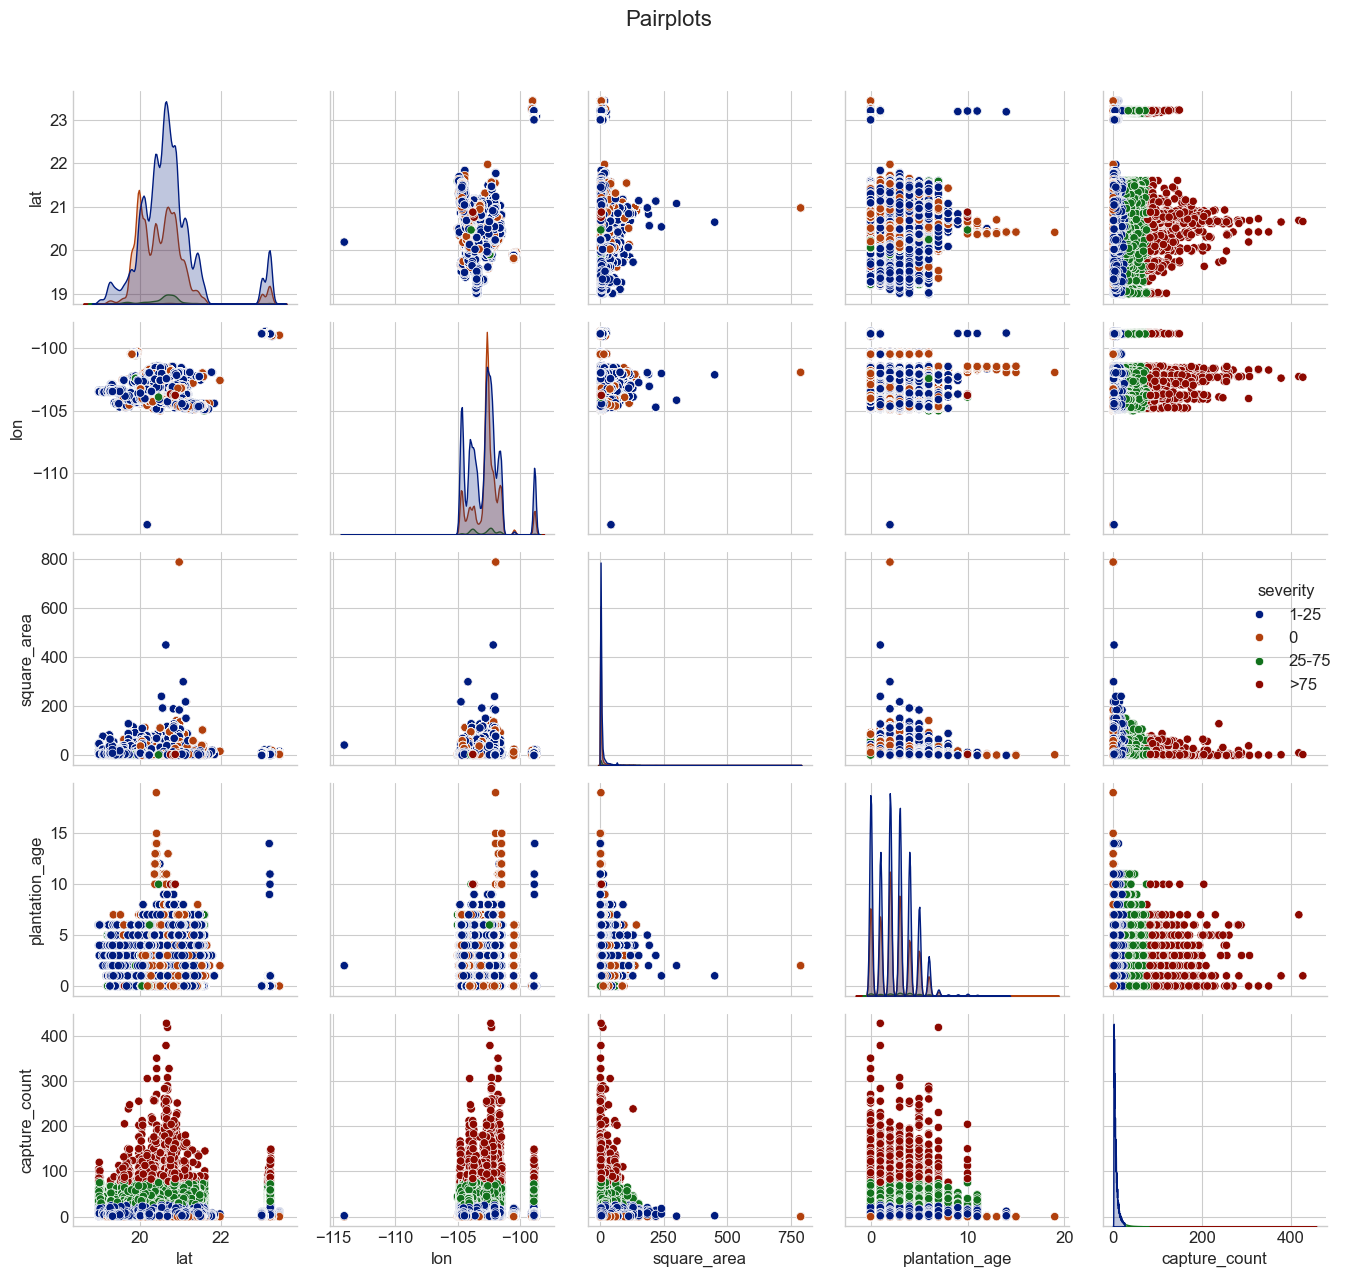

In [53]:
import warnings
warnings.filterwarnings("ignore", message=".*palette.*hue.*")

plots = sns.pairplot(all_historic_captures_df[['lat', 'lon', 'square_area', 'plantation_age', 'capture_count', 'severity']], palette='dark', hue='severity')

for i in range(len(plots.axes)):
    for j in range(len(plots.axes)):
        
        if i == len(plots.axes)-1:
            col_name = plots.axes[i,j].get_xlabel()
            plots.axes[i,j].set_xlabel(f"{col_name}")
            
        if j == 0:
            col_name = plots.axes[i,j].get_ylabel()
            plots.axes[i,j].set_ylabel(f"{col_name}")
            
plt.suptitle('Pairplots', y=1.02, fontsize=16)
plt.tight_layout()

Tomando en cuenta que al aplicar la separación de categorías a nuestro Pairplot de variables numéricas, encontramos lo siguiente:

- Las severidades moderadas y altas (25-75 y 75+) se encuentran concentradas respecto a la latitud y longitud. Esto sugiere que existen puntos dentro del territorio muestreado donde es más factible que el gorgojo del agave esté presente, y por lo tanto, es donde más se debe controlar a la población del mismo.

- Respecto a los valores de `square_area` (`tamaño del predio`), también encontramos que las severidades moderadas y altas se encuentran fuertemente identificadas. Con esto, debemos recordar que muchos de los registros de `square_area` no fueron debidamente registrados, por lo que esta segmentación podría ser válida solo a partir de los registros de 2020 en adelante.

- Respecto a la edad de la platanción (`plantation_age`), notamos que es posible encontrar una segmentación clara en las severidades, ya que nuevamente:
   - Las muestras a 0 y leves se encuentran bastante agrupadas. Algo notorio es que los predios con más edad se encuentran en esta categoría, pero no es posible generalizar esto porque las muestras de predios mayores a 8.5 años forman menos del 0.5% de los datos.
   - Las muestras moderadas pueden identificarse bastante bien. En éstas notamos que ningún predio supera 11 años de edad, y que existe una reducción significativa de dichos predios a partir de los 9 años de edad.
   - Las muestras con niveles severos se concentran en predios con edades menores a 10 años. Esto hace bastante sentido ya que es raro encontrar predios con plantaciones de más de 5 a 8 años de edad.

# Conclusiones acerca del EDA


El EDA realizado sobre el muestreo de trampas para detección de gorgojos en plantaciones de agave permitió limpiar y estructurar un dataset confiable, eliminando columnas redundantes y registros con datos faltantes en ubicación, superficie y edad de plantación. Se encontró que la mayoría de los predios son jóvenes (edad promedio ~2.4 años), con superficies pequeñas (promedio de 5 ha, aunque con alta variabilidad) y un nivel de infestación generalmente moderado (promedio ~4 gorgojos por trampa), aunque existen focos críticos con valores extremos que superan ampliamente el umbral de infestación. 

Entre los hallazgos más relevantes tenemos lo siguiente:

- Distribución espacial: la mayor concentración de trampas está en Jalisco. 
<br>
- Patrón de infestación: la mayoría de predios no supera el umbral de riesgo (≥5 gorgojos/día), pero algunos brotes aislados muestran infestaciones muy altas. Interesantemente, los brotes son realmente aislados y parecen no afectar de manera directa a predios vecinos.
<br>
- Aspectos operativos: el agave suele ser jimado a los 4-5 años de edad, lo que indica que predios afuera de este rango de edad son predios abandonados.
<br>
- Distribución temporal: la cantidad promedio de gorgojos por trampa se incrementa en los meses de lluvia (junio - diciembre), lo cual fue confirmado por los patrocinadores. Por otro lado, la data no permite saber si la temperatura tiene algún efecto sobre el gorgojo y su reproducción.
<br>
- Respecto a la variable `Severidad`:
  - Notamos una segmentación clara respecto a la edad del predio, ubicación y área registrada del mismo. También existe una estacionalidad marcada en la cual a medio año y finales de año la cantidad de gorgojos del agave capturados aumenta significativamente.
  - No es normal encontrar focos de infección severos, pero sí es normal encontrar focos leves o moderados. 

- Respecto a la variable `Fecha de muestreo`:
  - Esta permitión hallar que la pandemia afectó el dataset estudiadio. Esto se debe a que operativamente no era posible realizar el muestreo de gorgojos dentro de las trampas instaladas, y por lo tanto se perdió bastante información.
  - También fue posible observar que a partir de junio de cada año se detecta un aumento en la cantidad de capturas realizadas por cada trampa.

- Respecto a la cantidad de capturas por trampa:
  - Notamos una cantidad de capturas promedio con estacionalidad (ignorando lo sucedido de 2019 a 2023 aprox. por la pandemia). 
  - El conjunto de datos de cantidad de capturas posee datos atípicos los cuales no debemos eliminar, ya que presentan la realidad ecológica. También es válido mencionar que estos outliers o casos atípicos representan los focos o sectores más críticos.
